In [28]:

import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, classification_report
import matplotlib.pyplot as plt
from sklearn import tree
import seaborn as sns
plt.rcParams['figure.figsize'] = (18,8)
plt.rcParams['figure.dpi'] = 150
sns.set_theme(style='darkgrid', palette='rainbow')
import warnings
warnings.filterwarnings('ignore')

In [29]:
xlsx = pd.ExcelFile('glass.xlsx')
data_description = pd.read_excel(xlsx, 'Description',header=1)
data = pd.read_excel(xlsx, 'glass')

In [30]:
data_description


,Data Description:
0,RI : refractive index
1,Na: Sodium (unit measurement: weight percent i...
2,Mg: Magnesium
3,AI: Aluminum
4,Si: Silicon
5,K:Potassium
6,Ca: Calcium
7,Ba: Barium
8,Fe: Iron
9,NaN


In [31]:
data.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [33]:
data[data.duplicated()]

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
39,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.0,1


In [34]:
data.drop_duplicates(inplace=True)


In [35]:
data.describe()


,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000
mean,1.518348,13.404085,2.679202,1.449484,72.655070,0.498873,8.954085,0.175869,0.057277,2.788732
std,0.003033,0.816662,1.443691,0.495925,0.773998,0.653185,1.425882,0.498245,0.097589,2.105130
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516520,12.900000,2.090000,1.190000,72.280000,0.130000,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.560000,8.600000,0.000000,0.000000,2.000000
75%,1.519150,13.810000,3.600000,1.630000,73.090000,0.610000,9.150000,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


Data Visualization


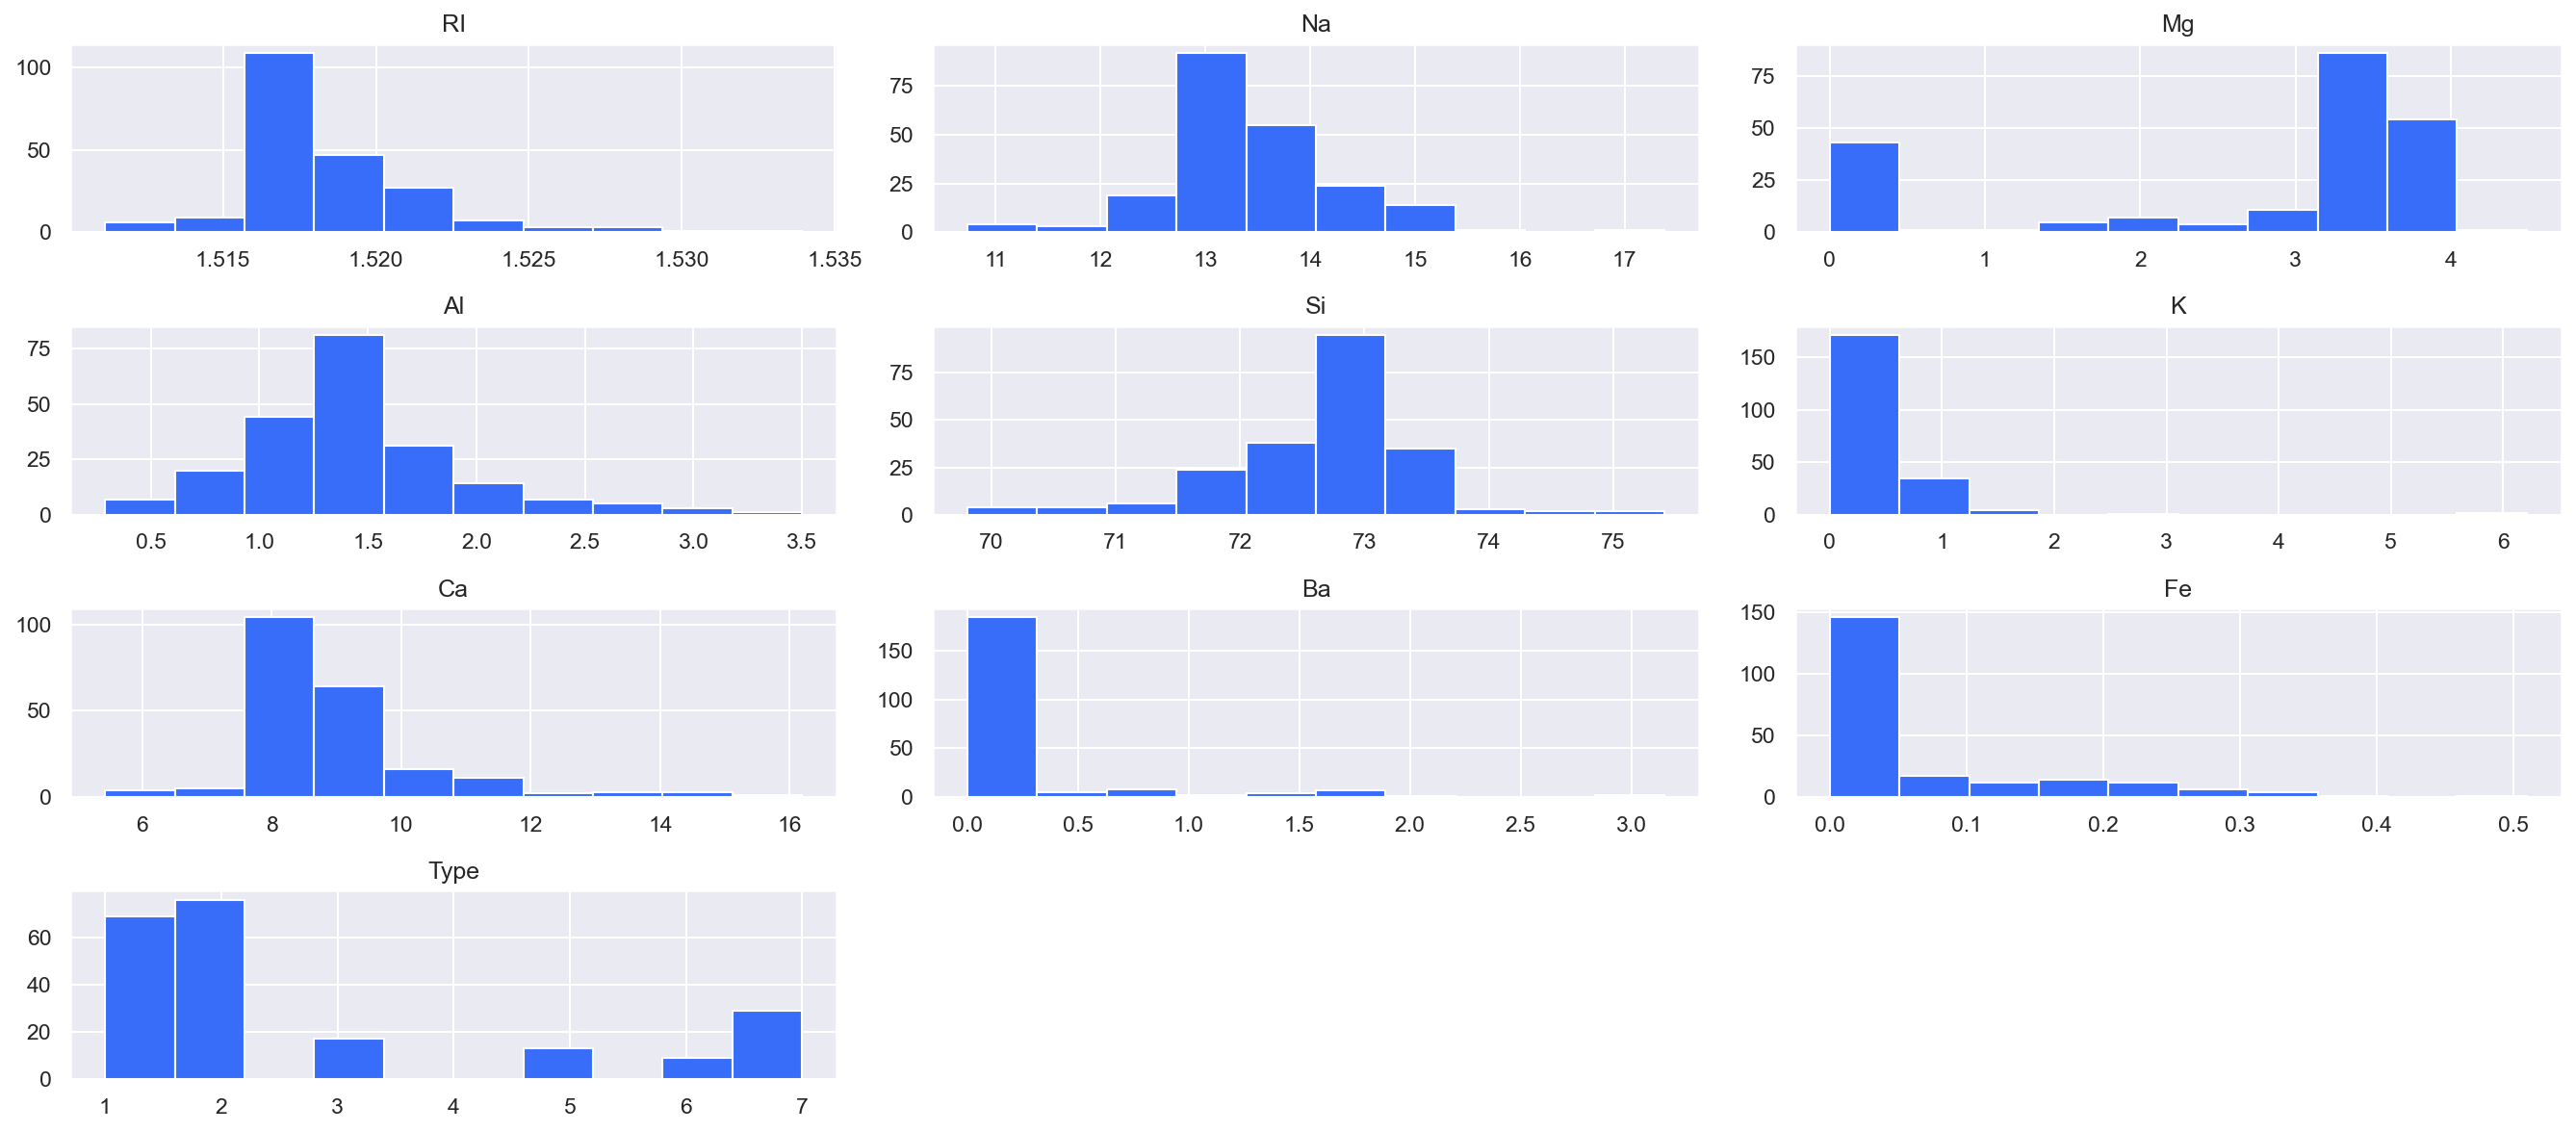

In [36]:
#histrogram
data.hist()
plt.tight_layout()
plt.show()

Distribution of columns "K", "Ba", "Fe" is highly skewed

Column : RI


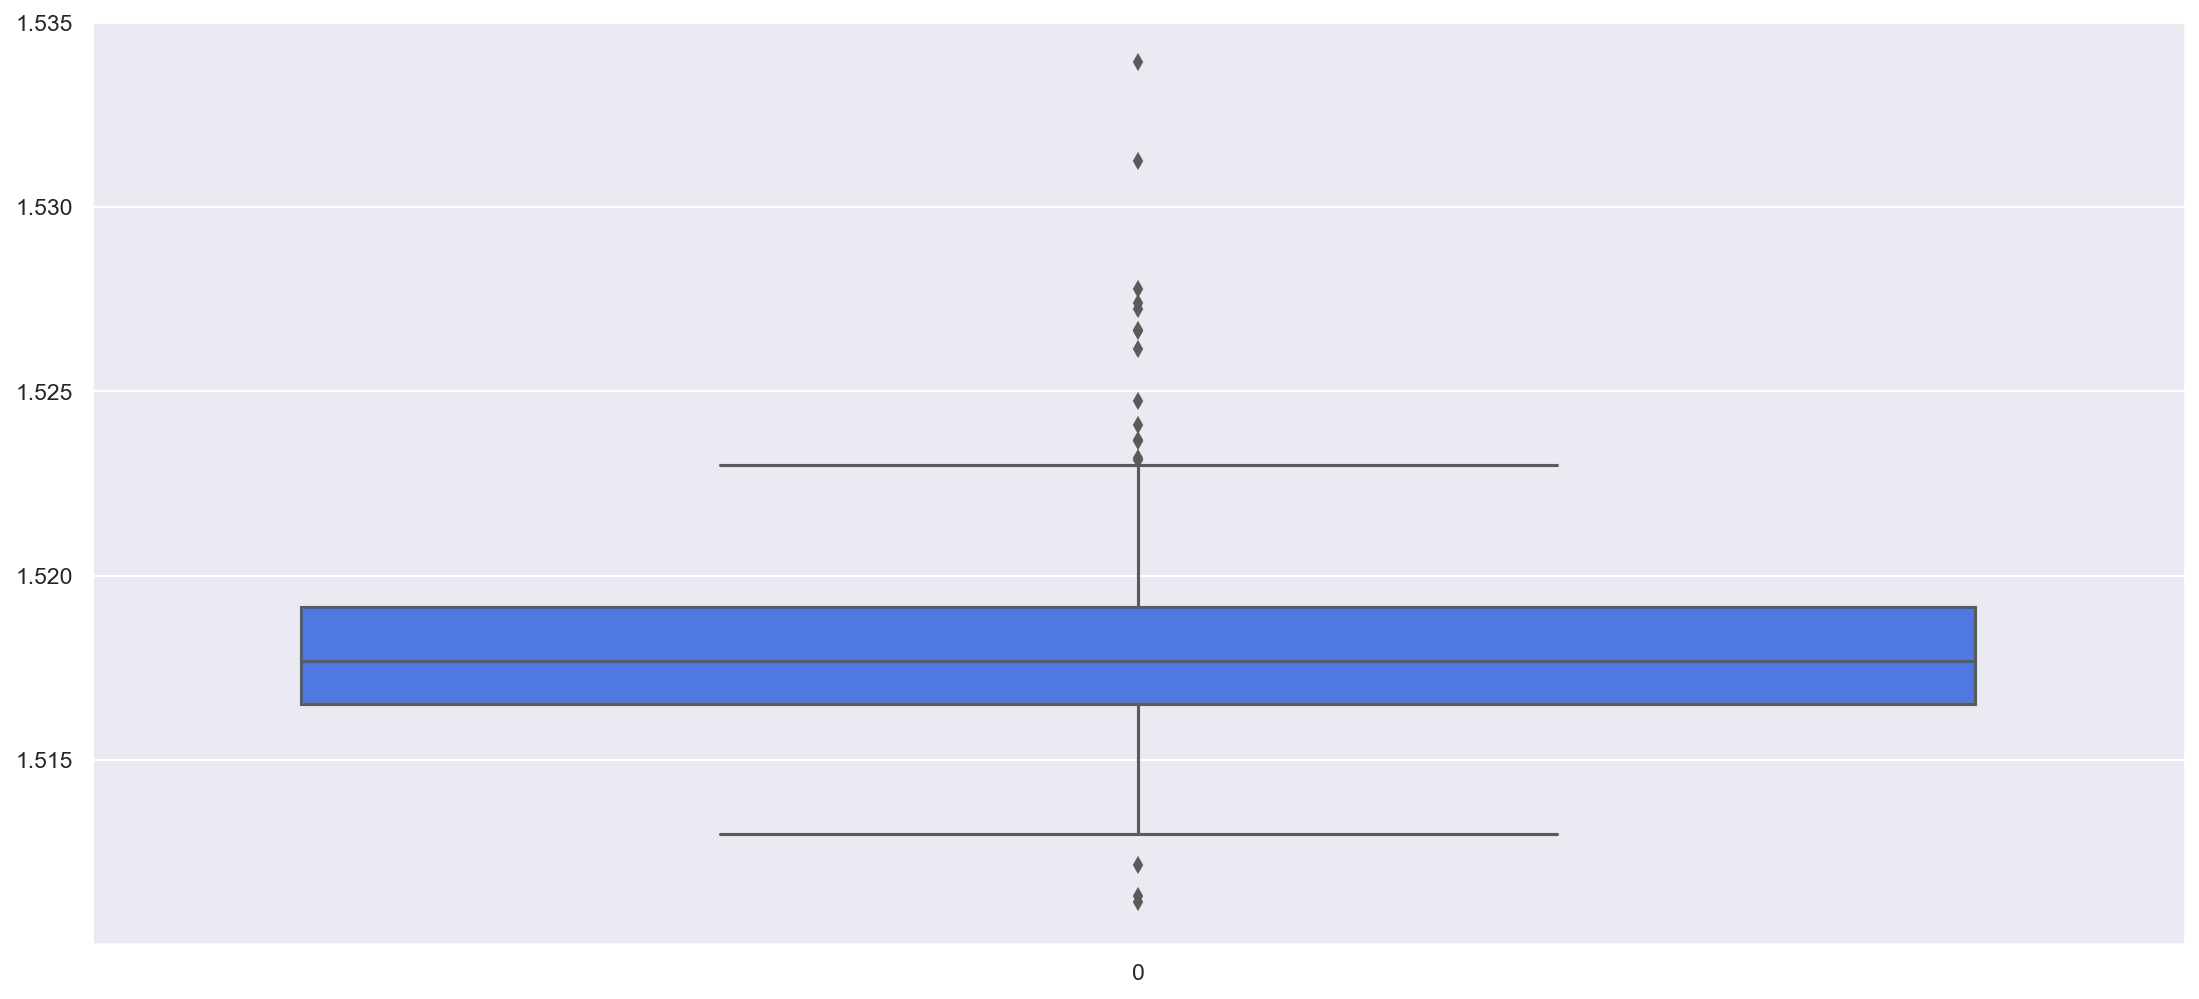

Column : Na


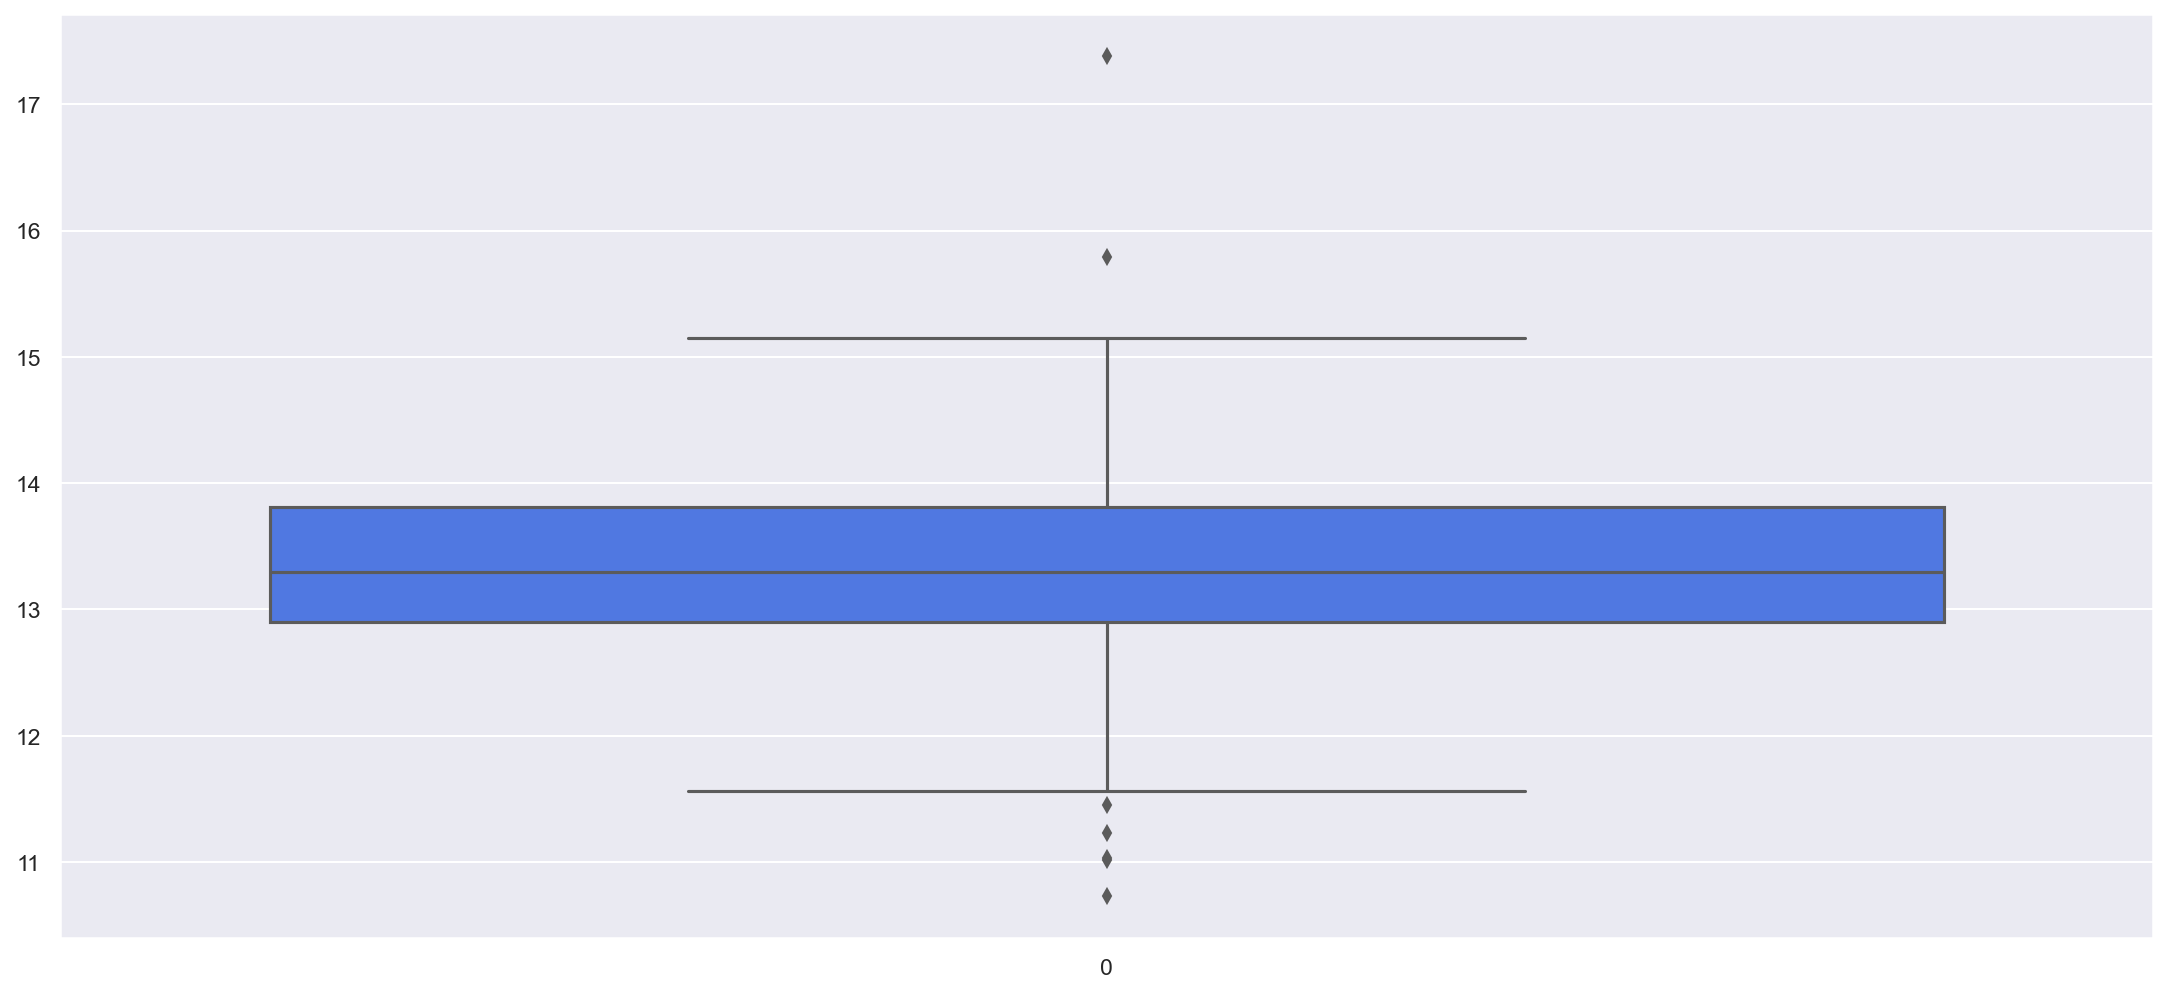

Column : Mg


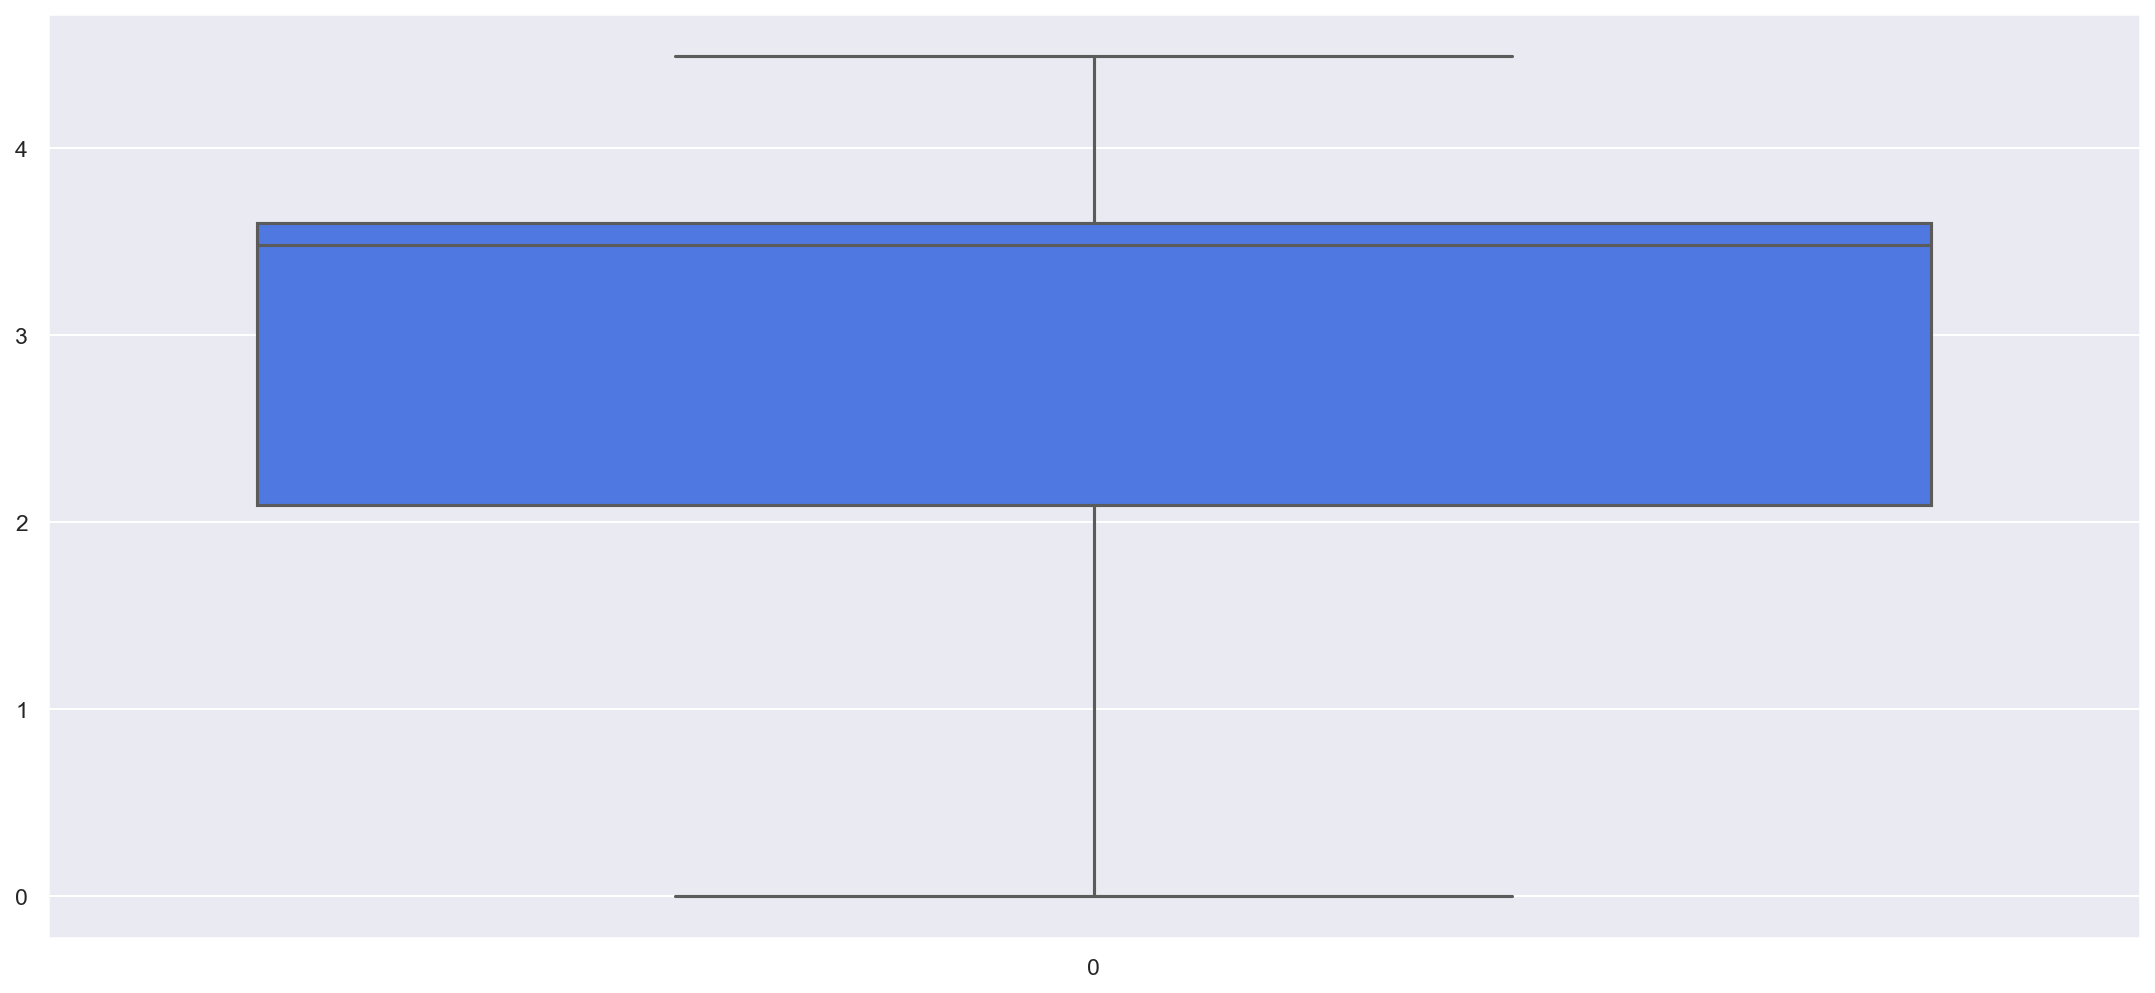

Column : Al


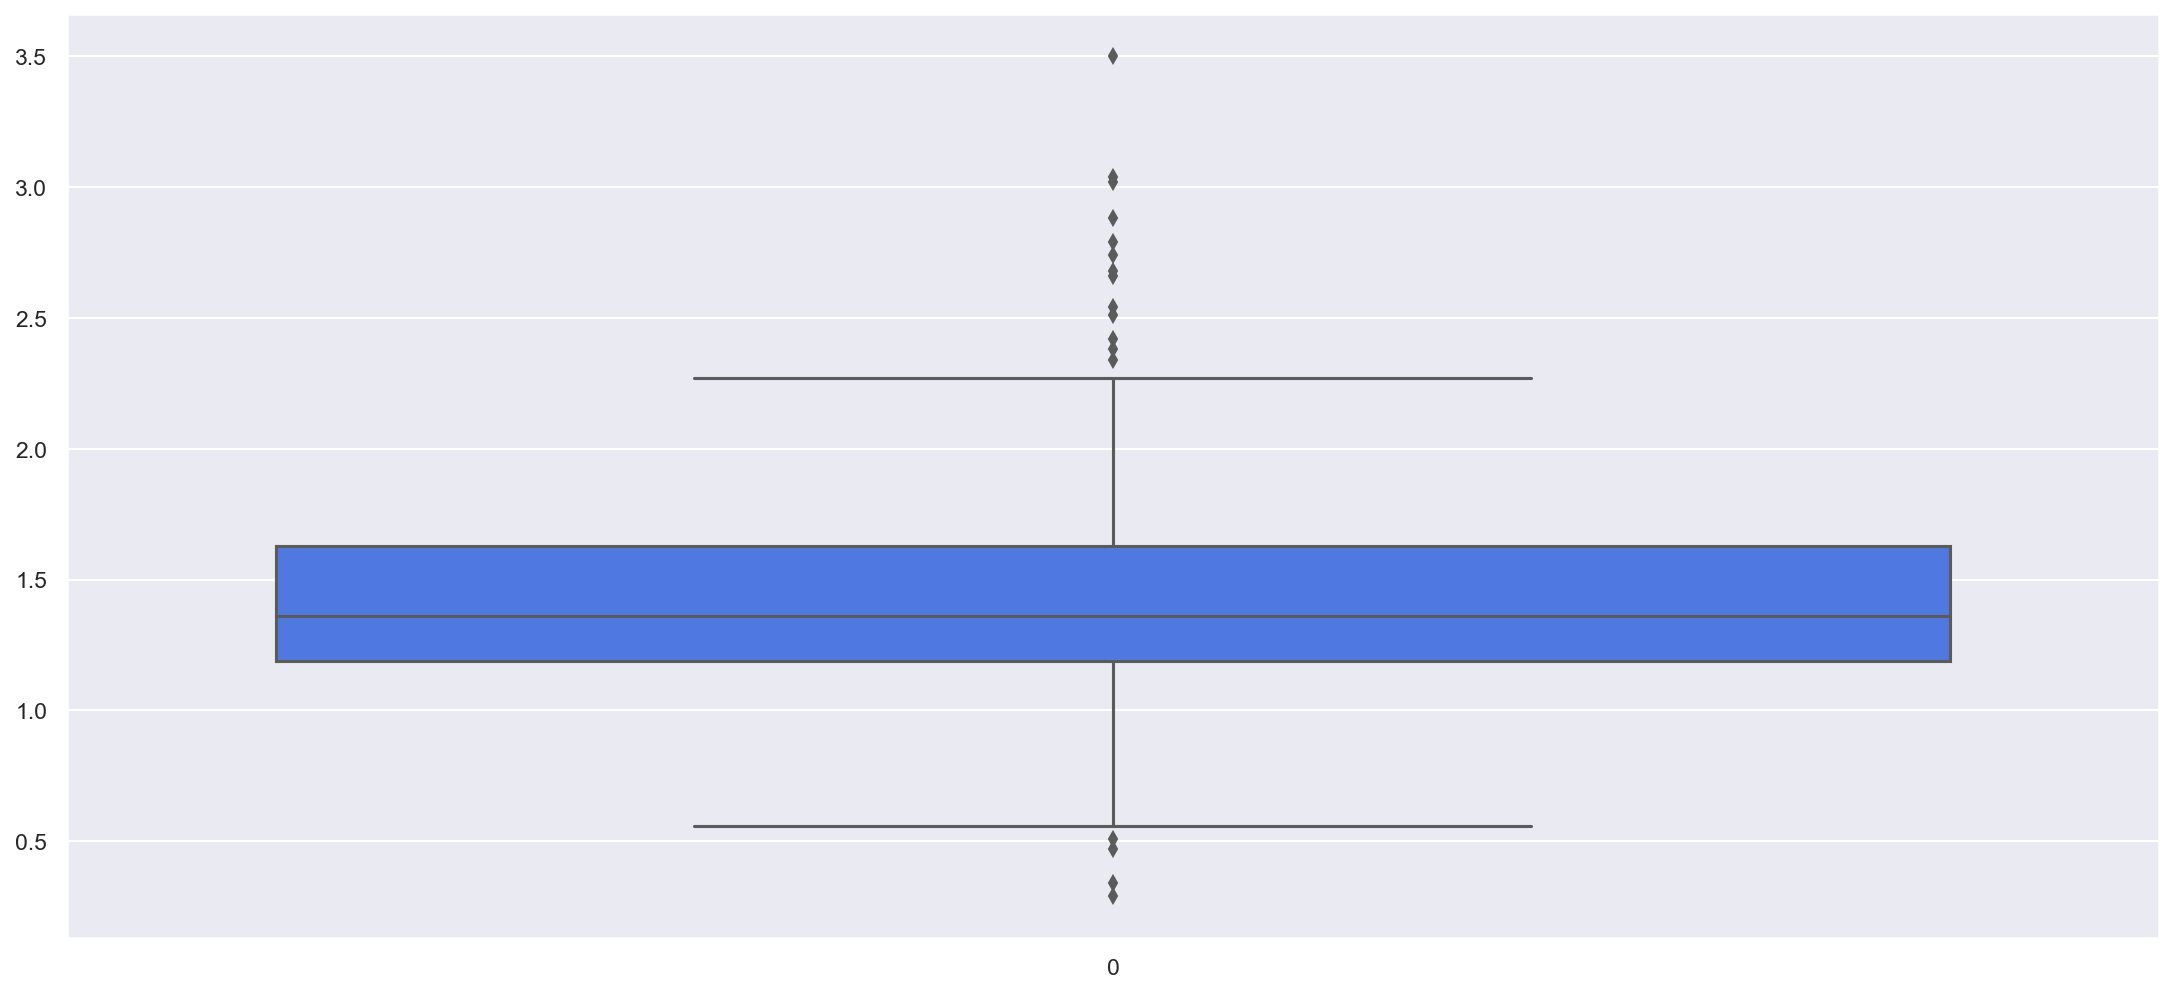

Column : Si


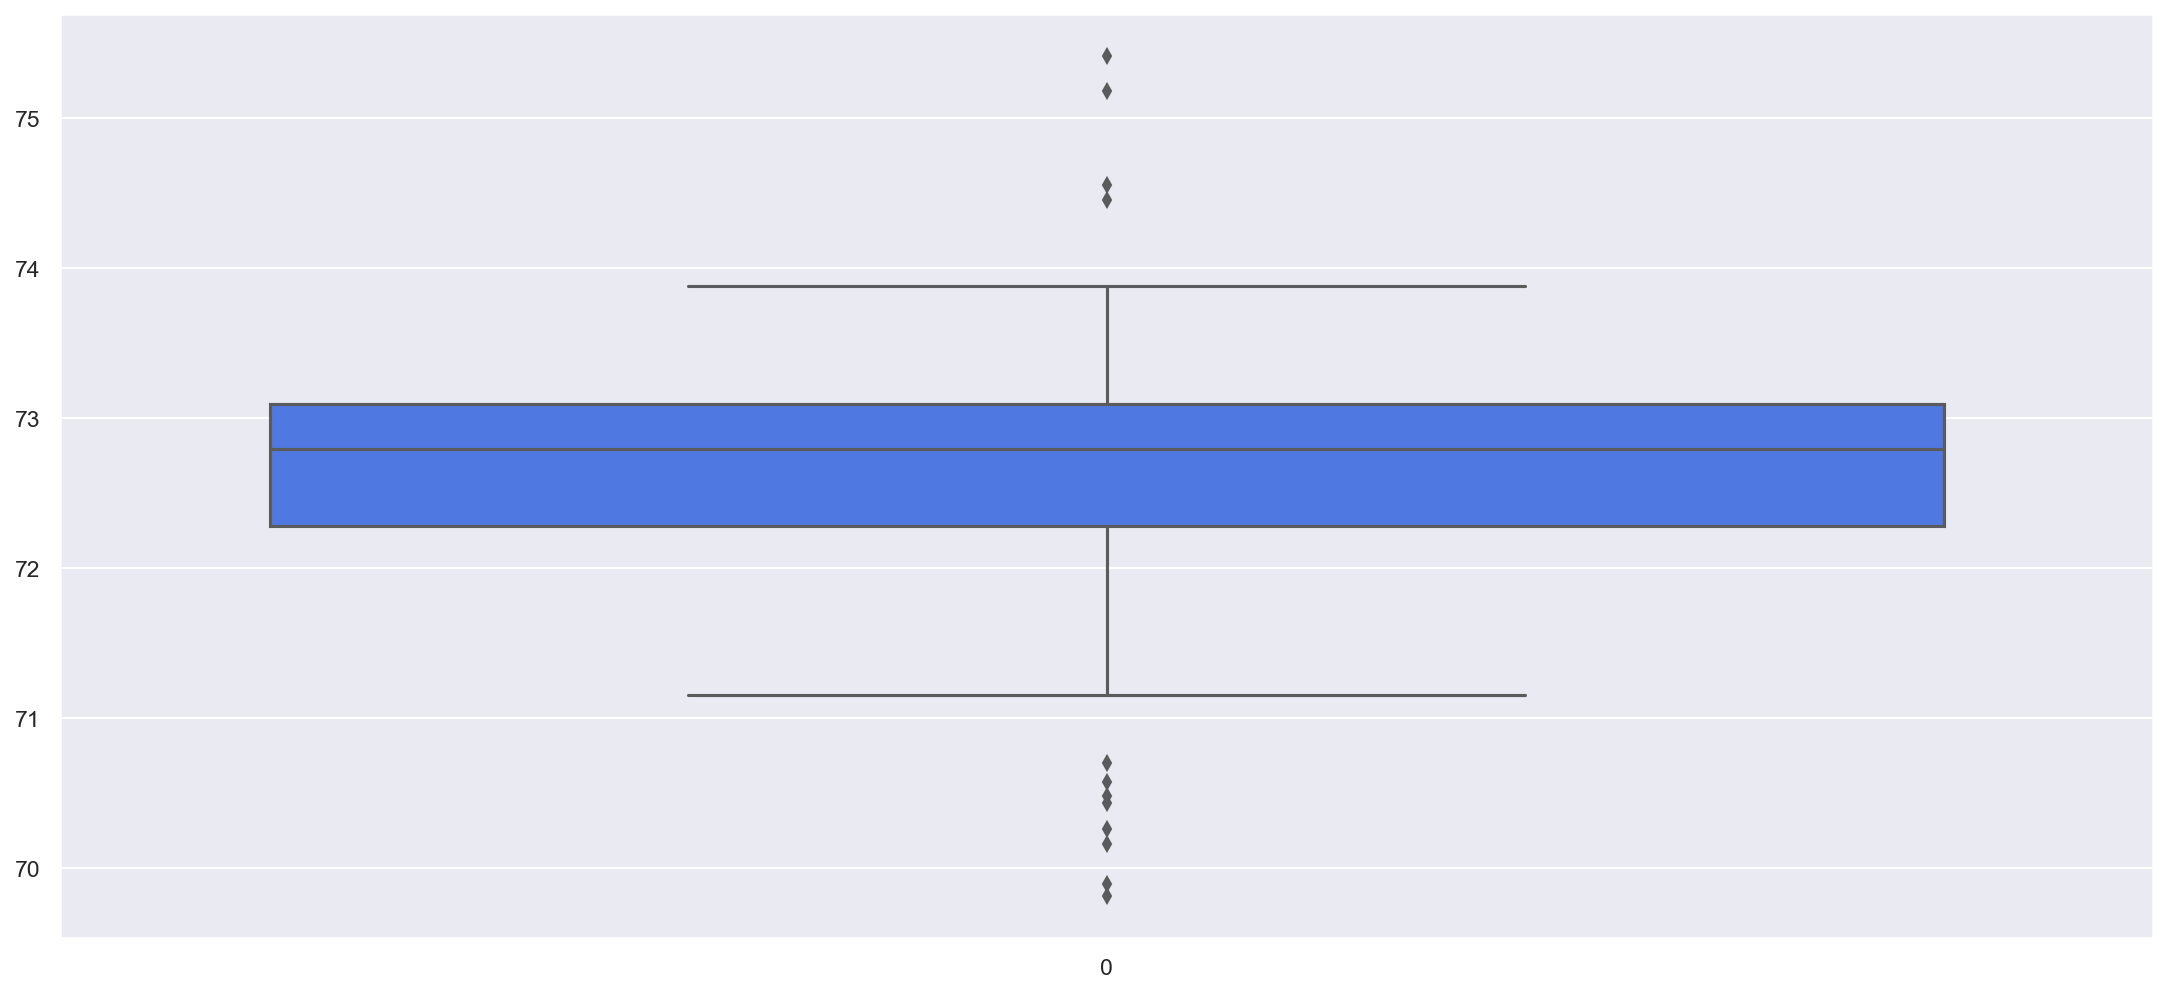

Column : K


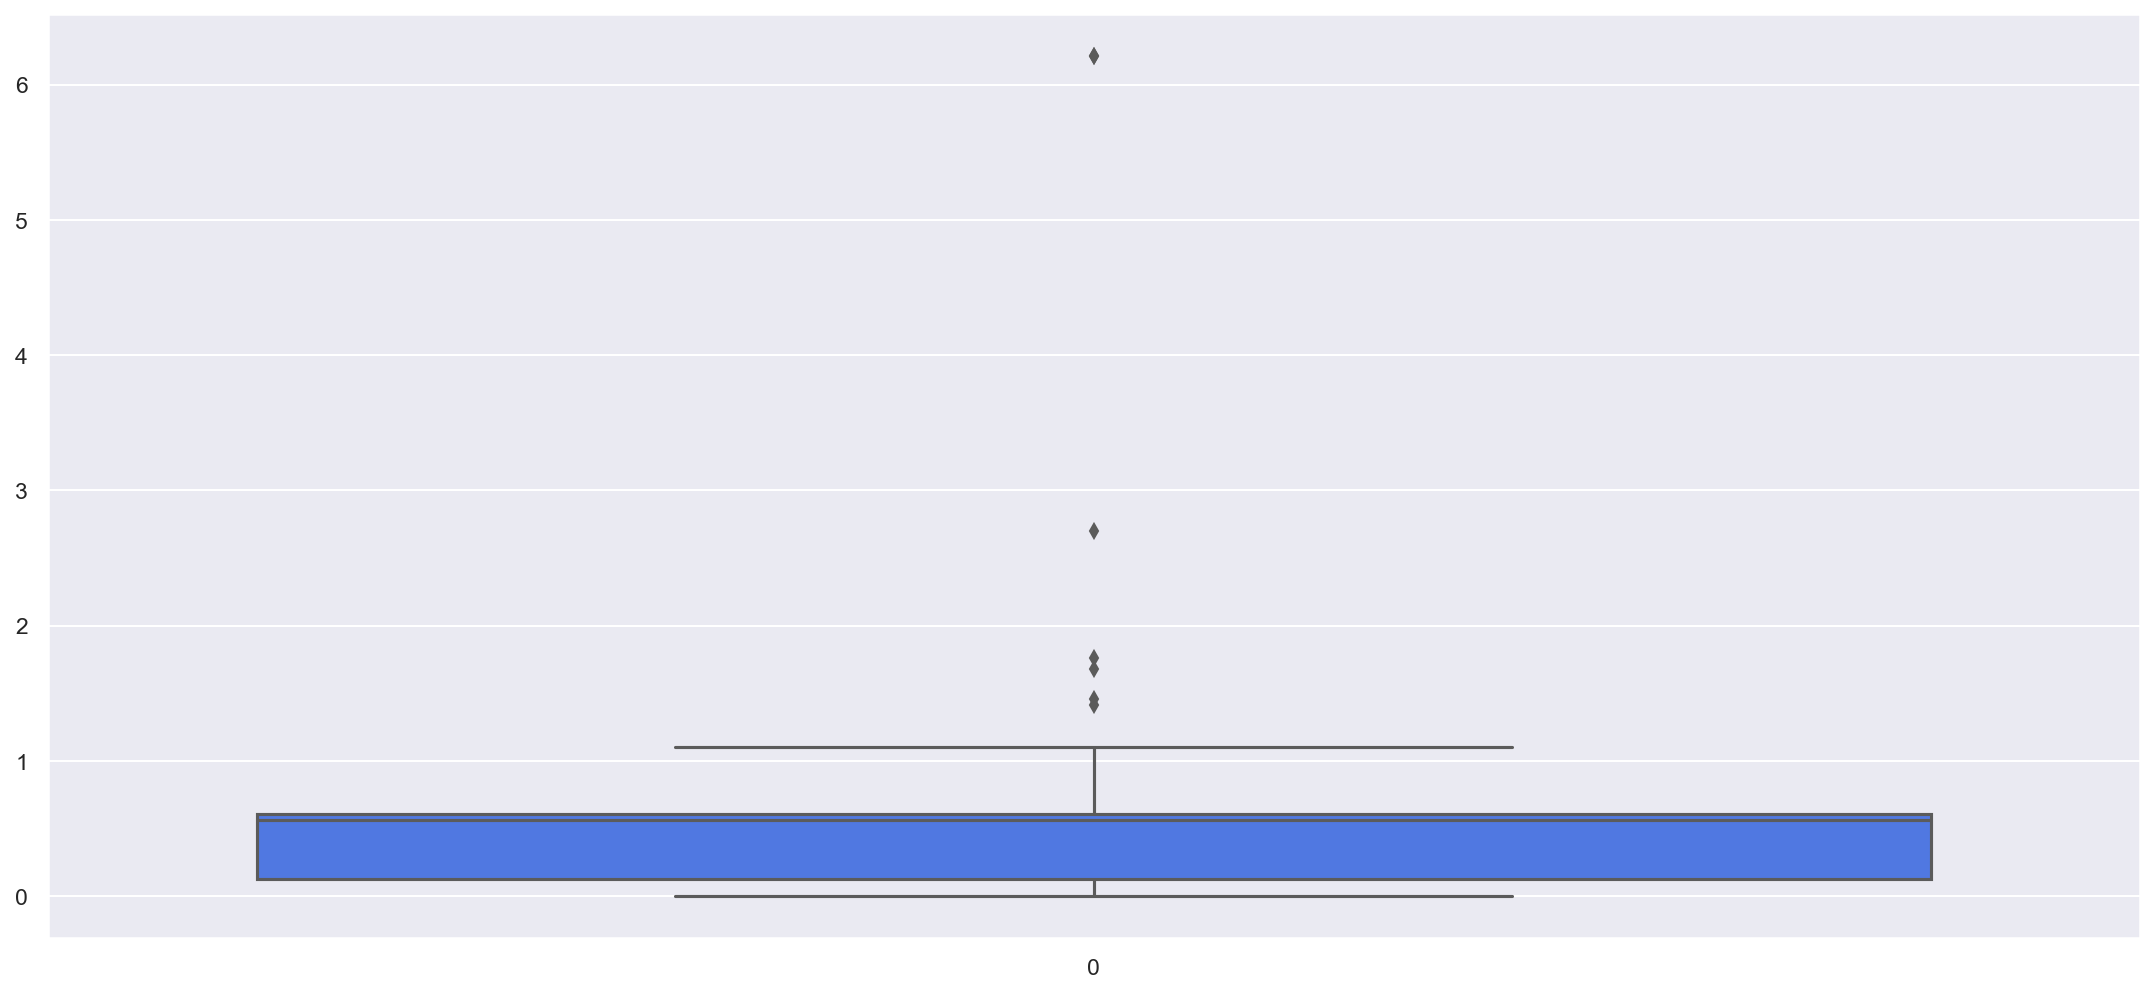

Column : Ca


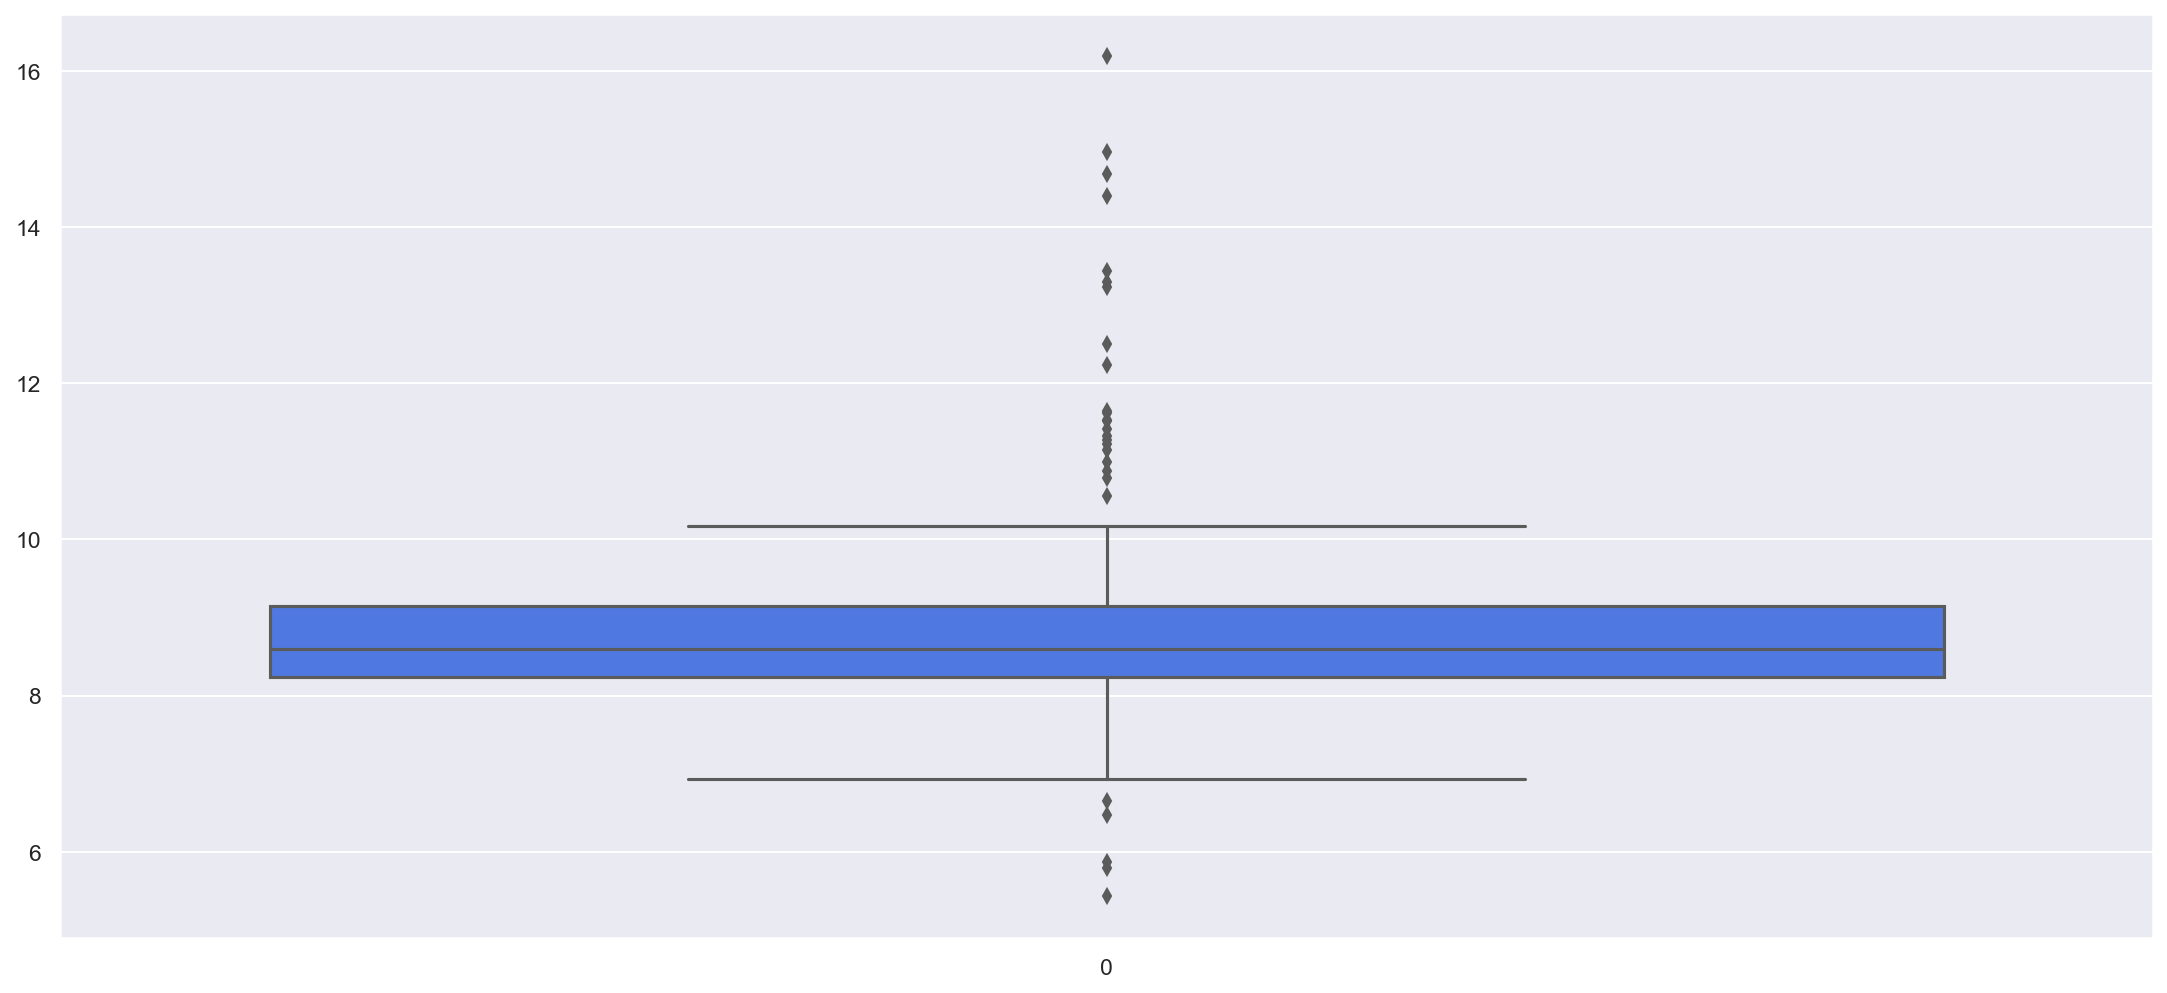

Column : Ba


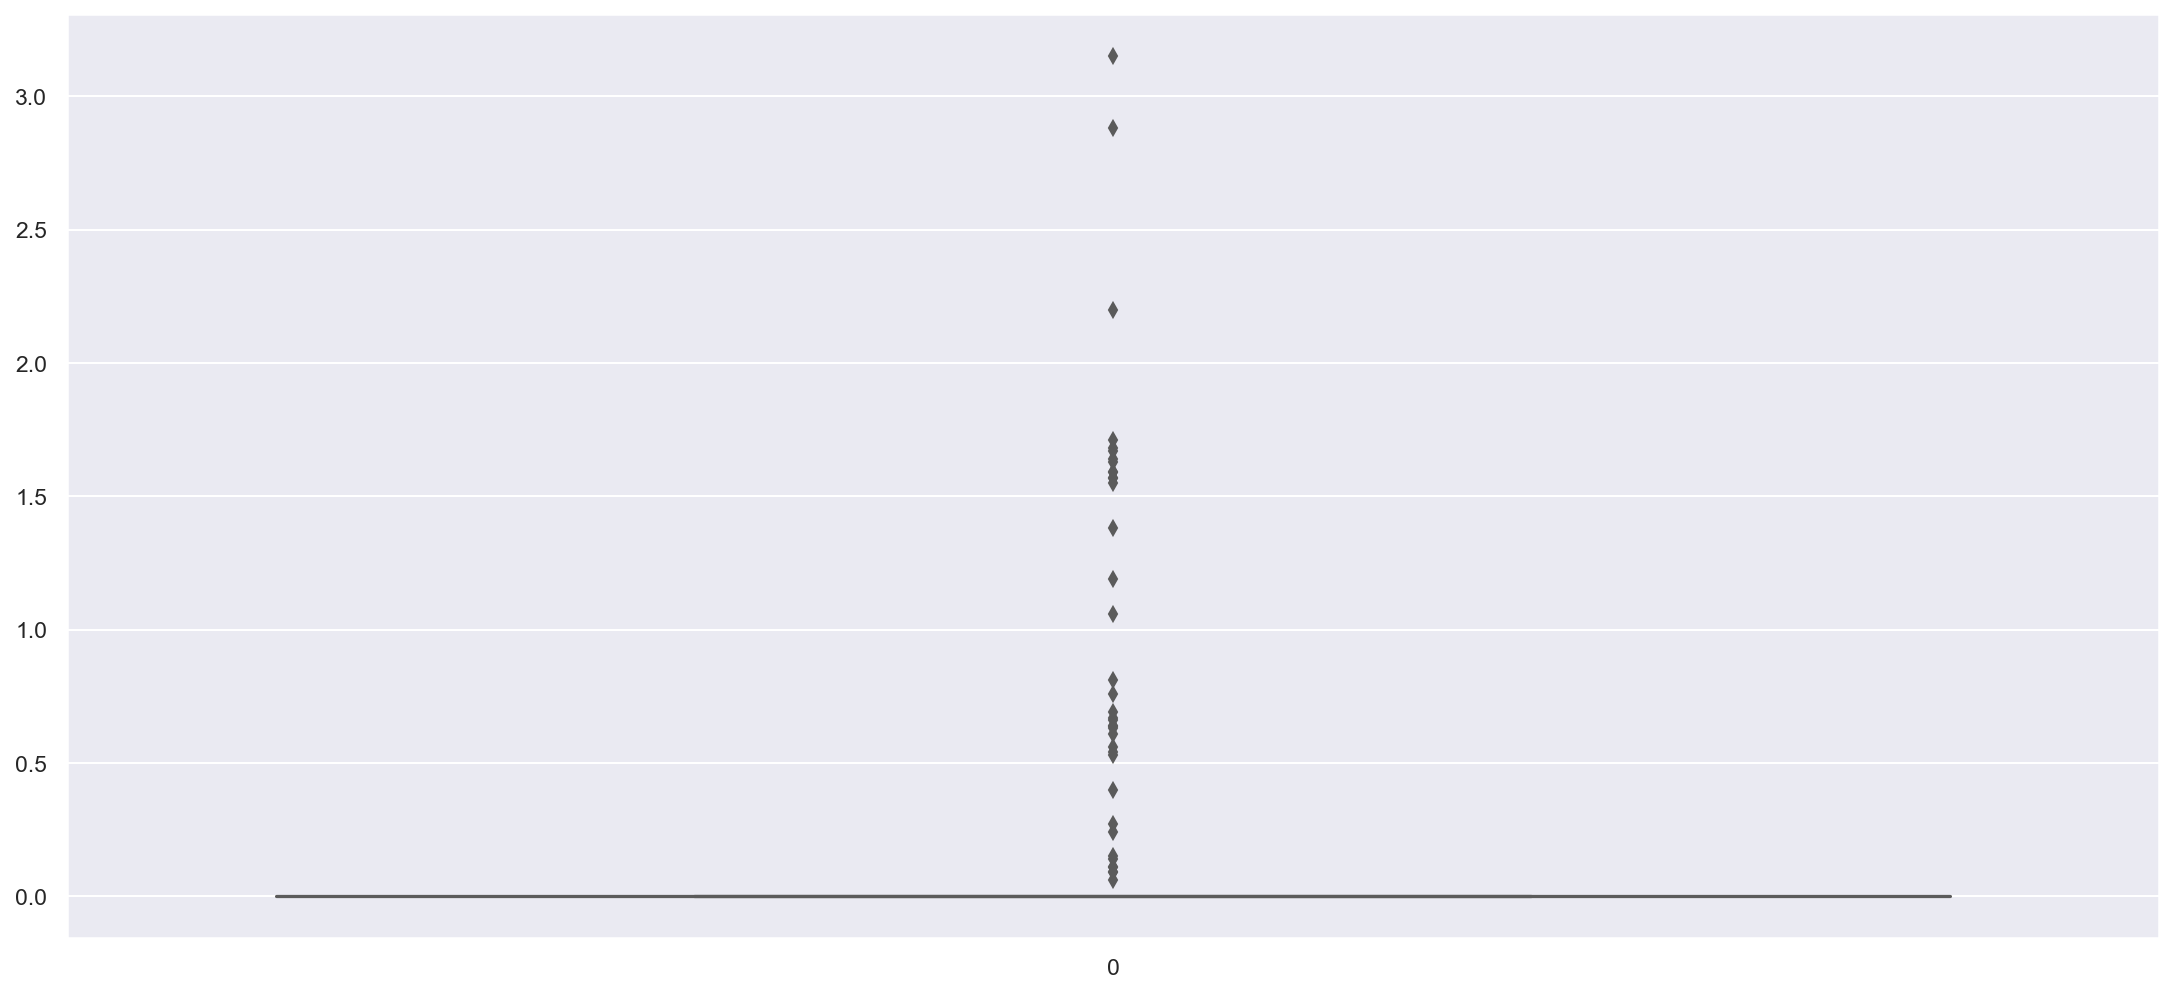

Column : Fe


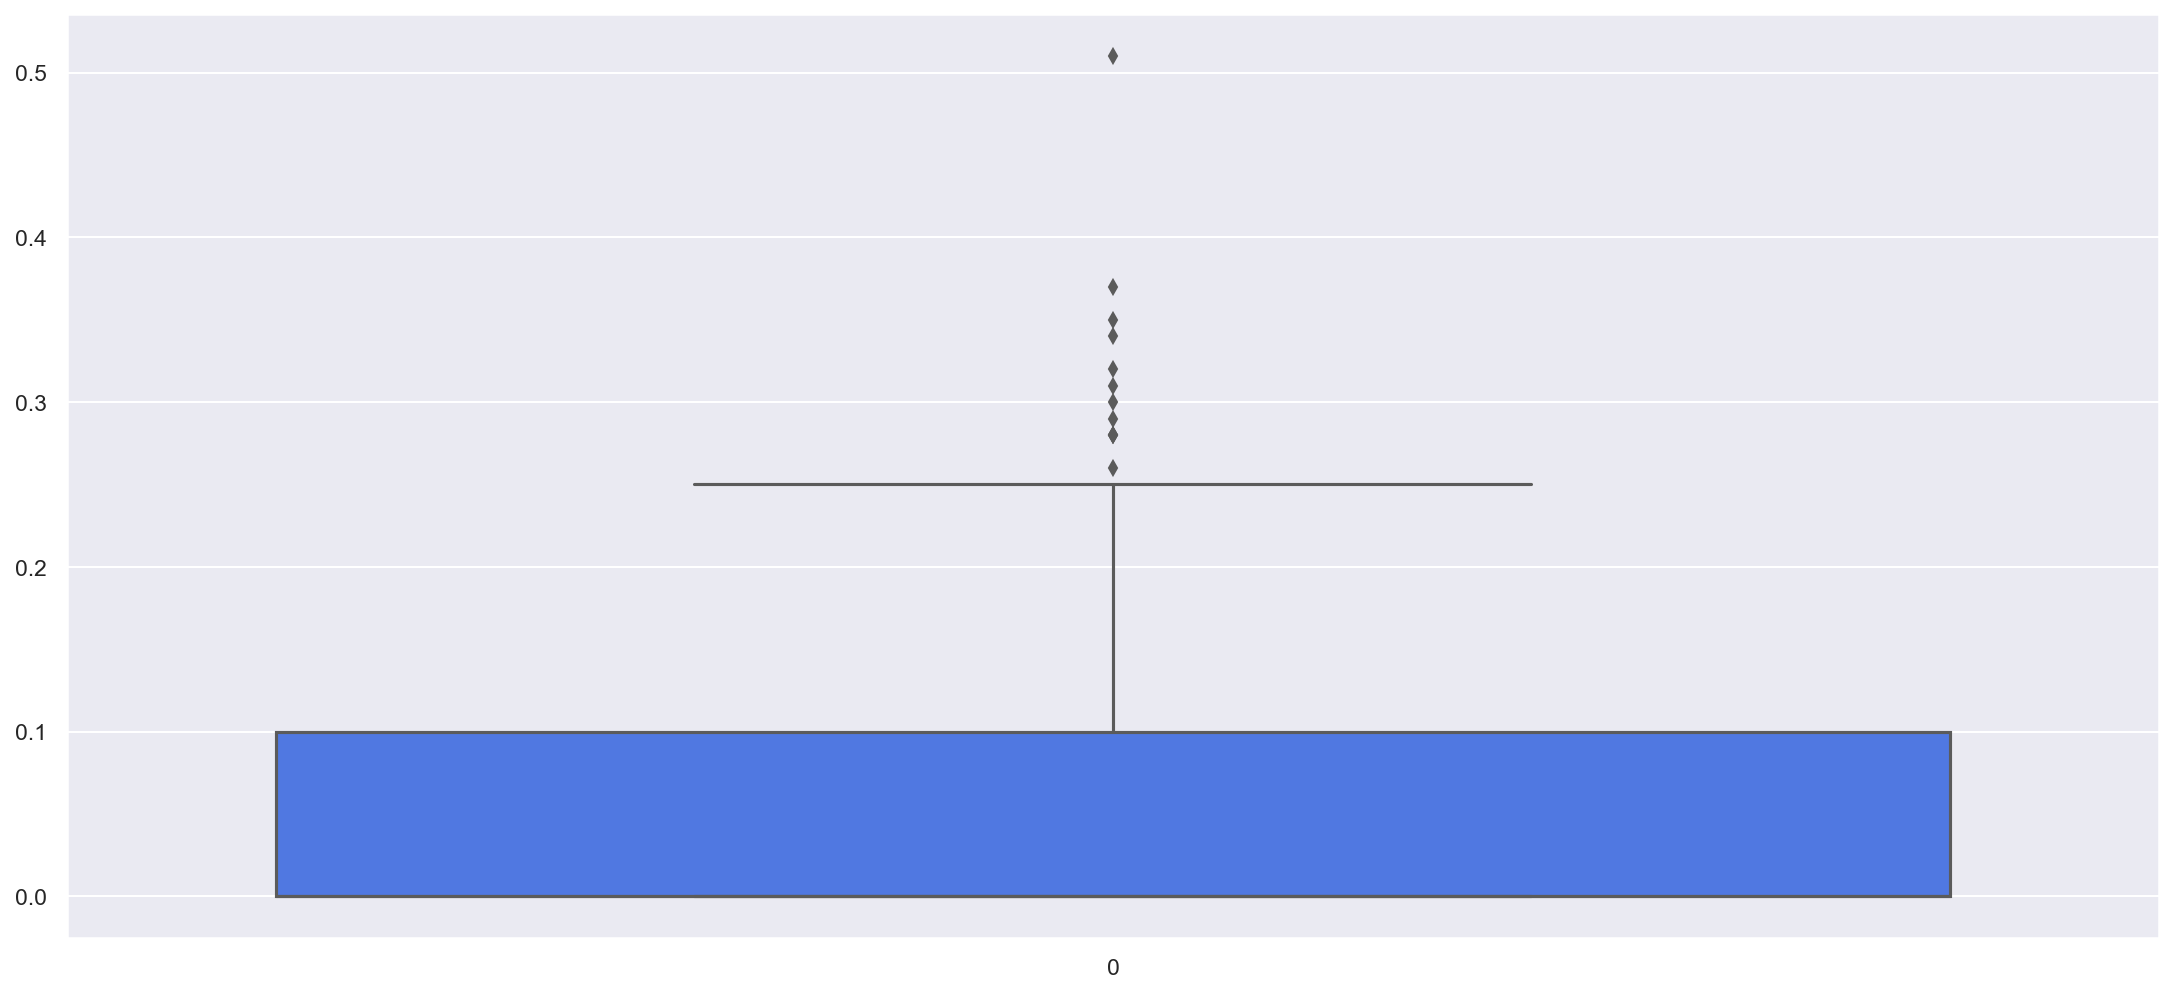

Column : Type


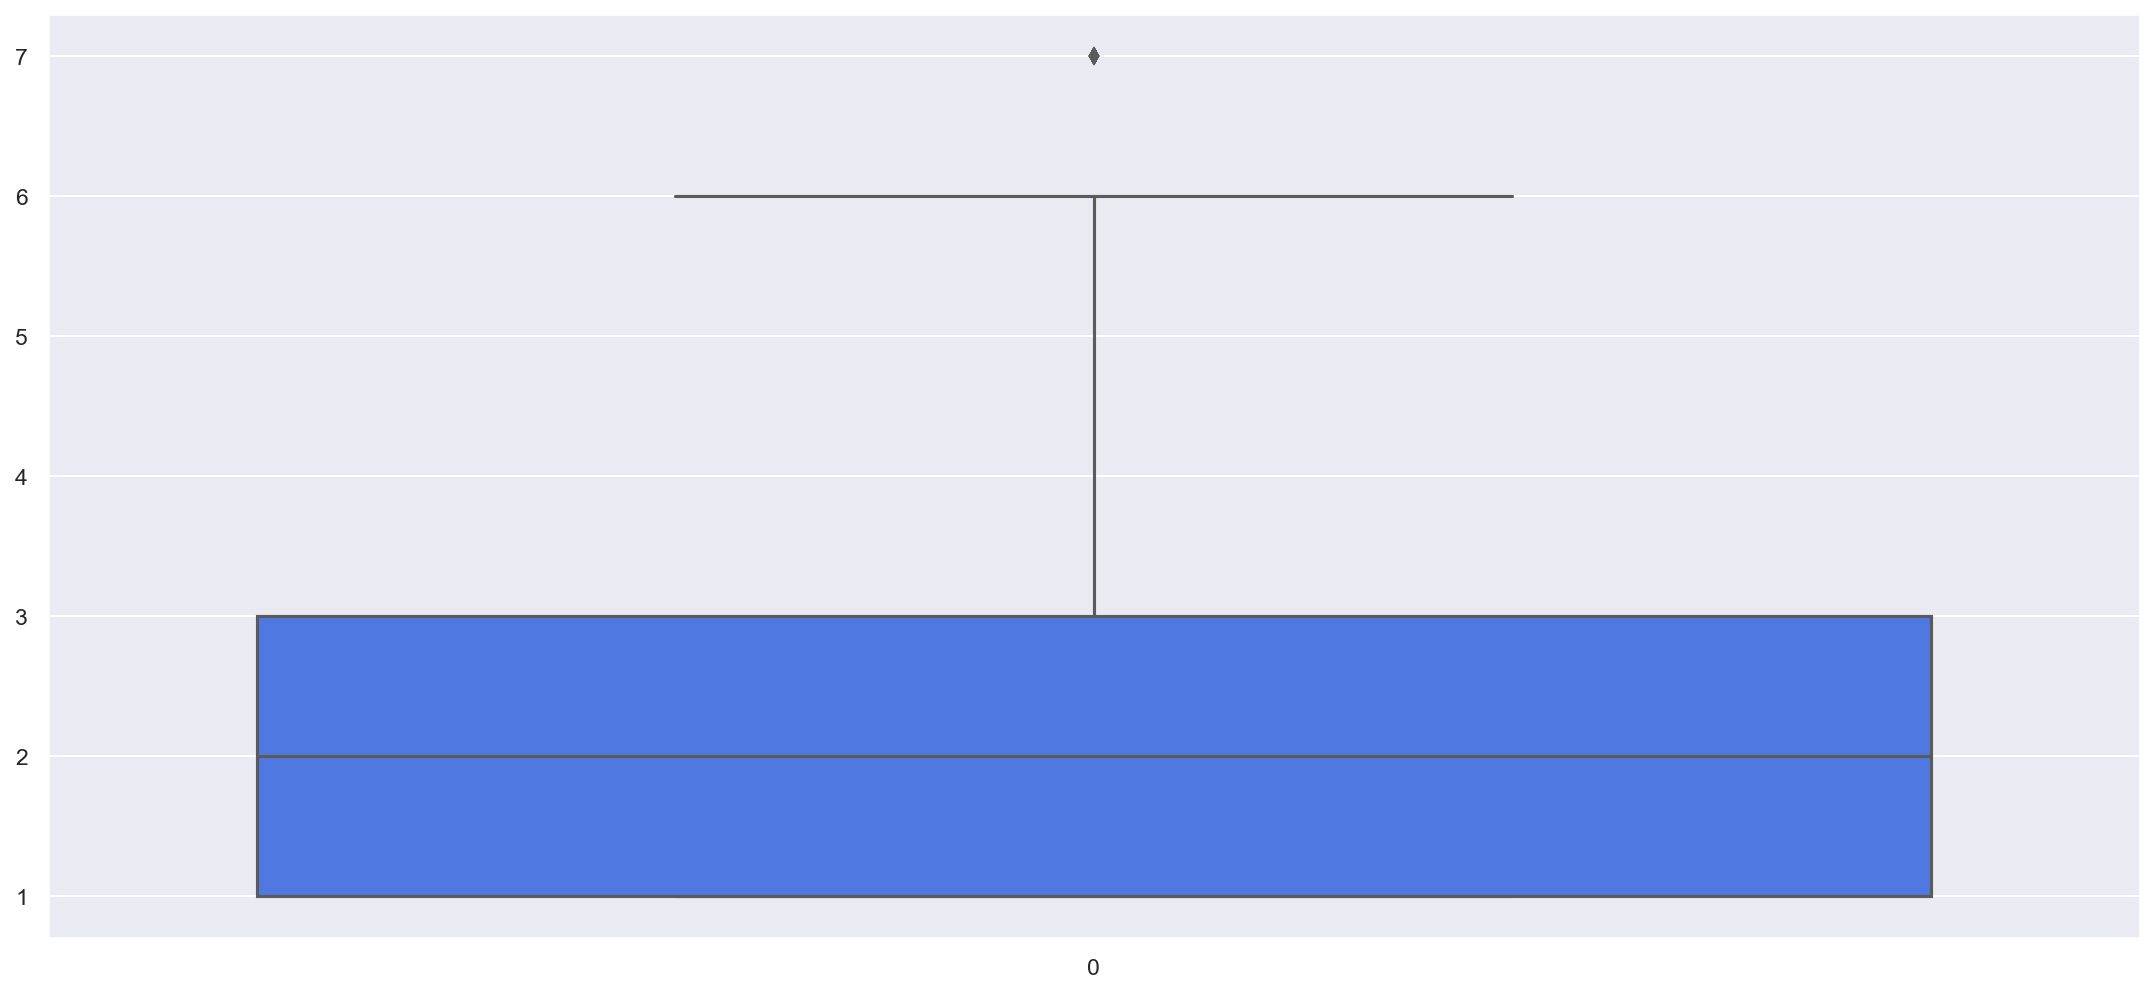

In [37]:
#boxplot
for col in data.columns:
    print('Column :',col)
    sns.boxplot(data[col])
    plt.show()


Even though boxplot shows that there are outliers, but the values are not much far. So, we will not perform the capping

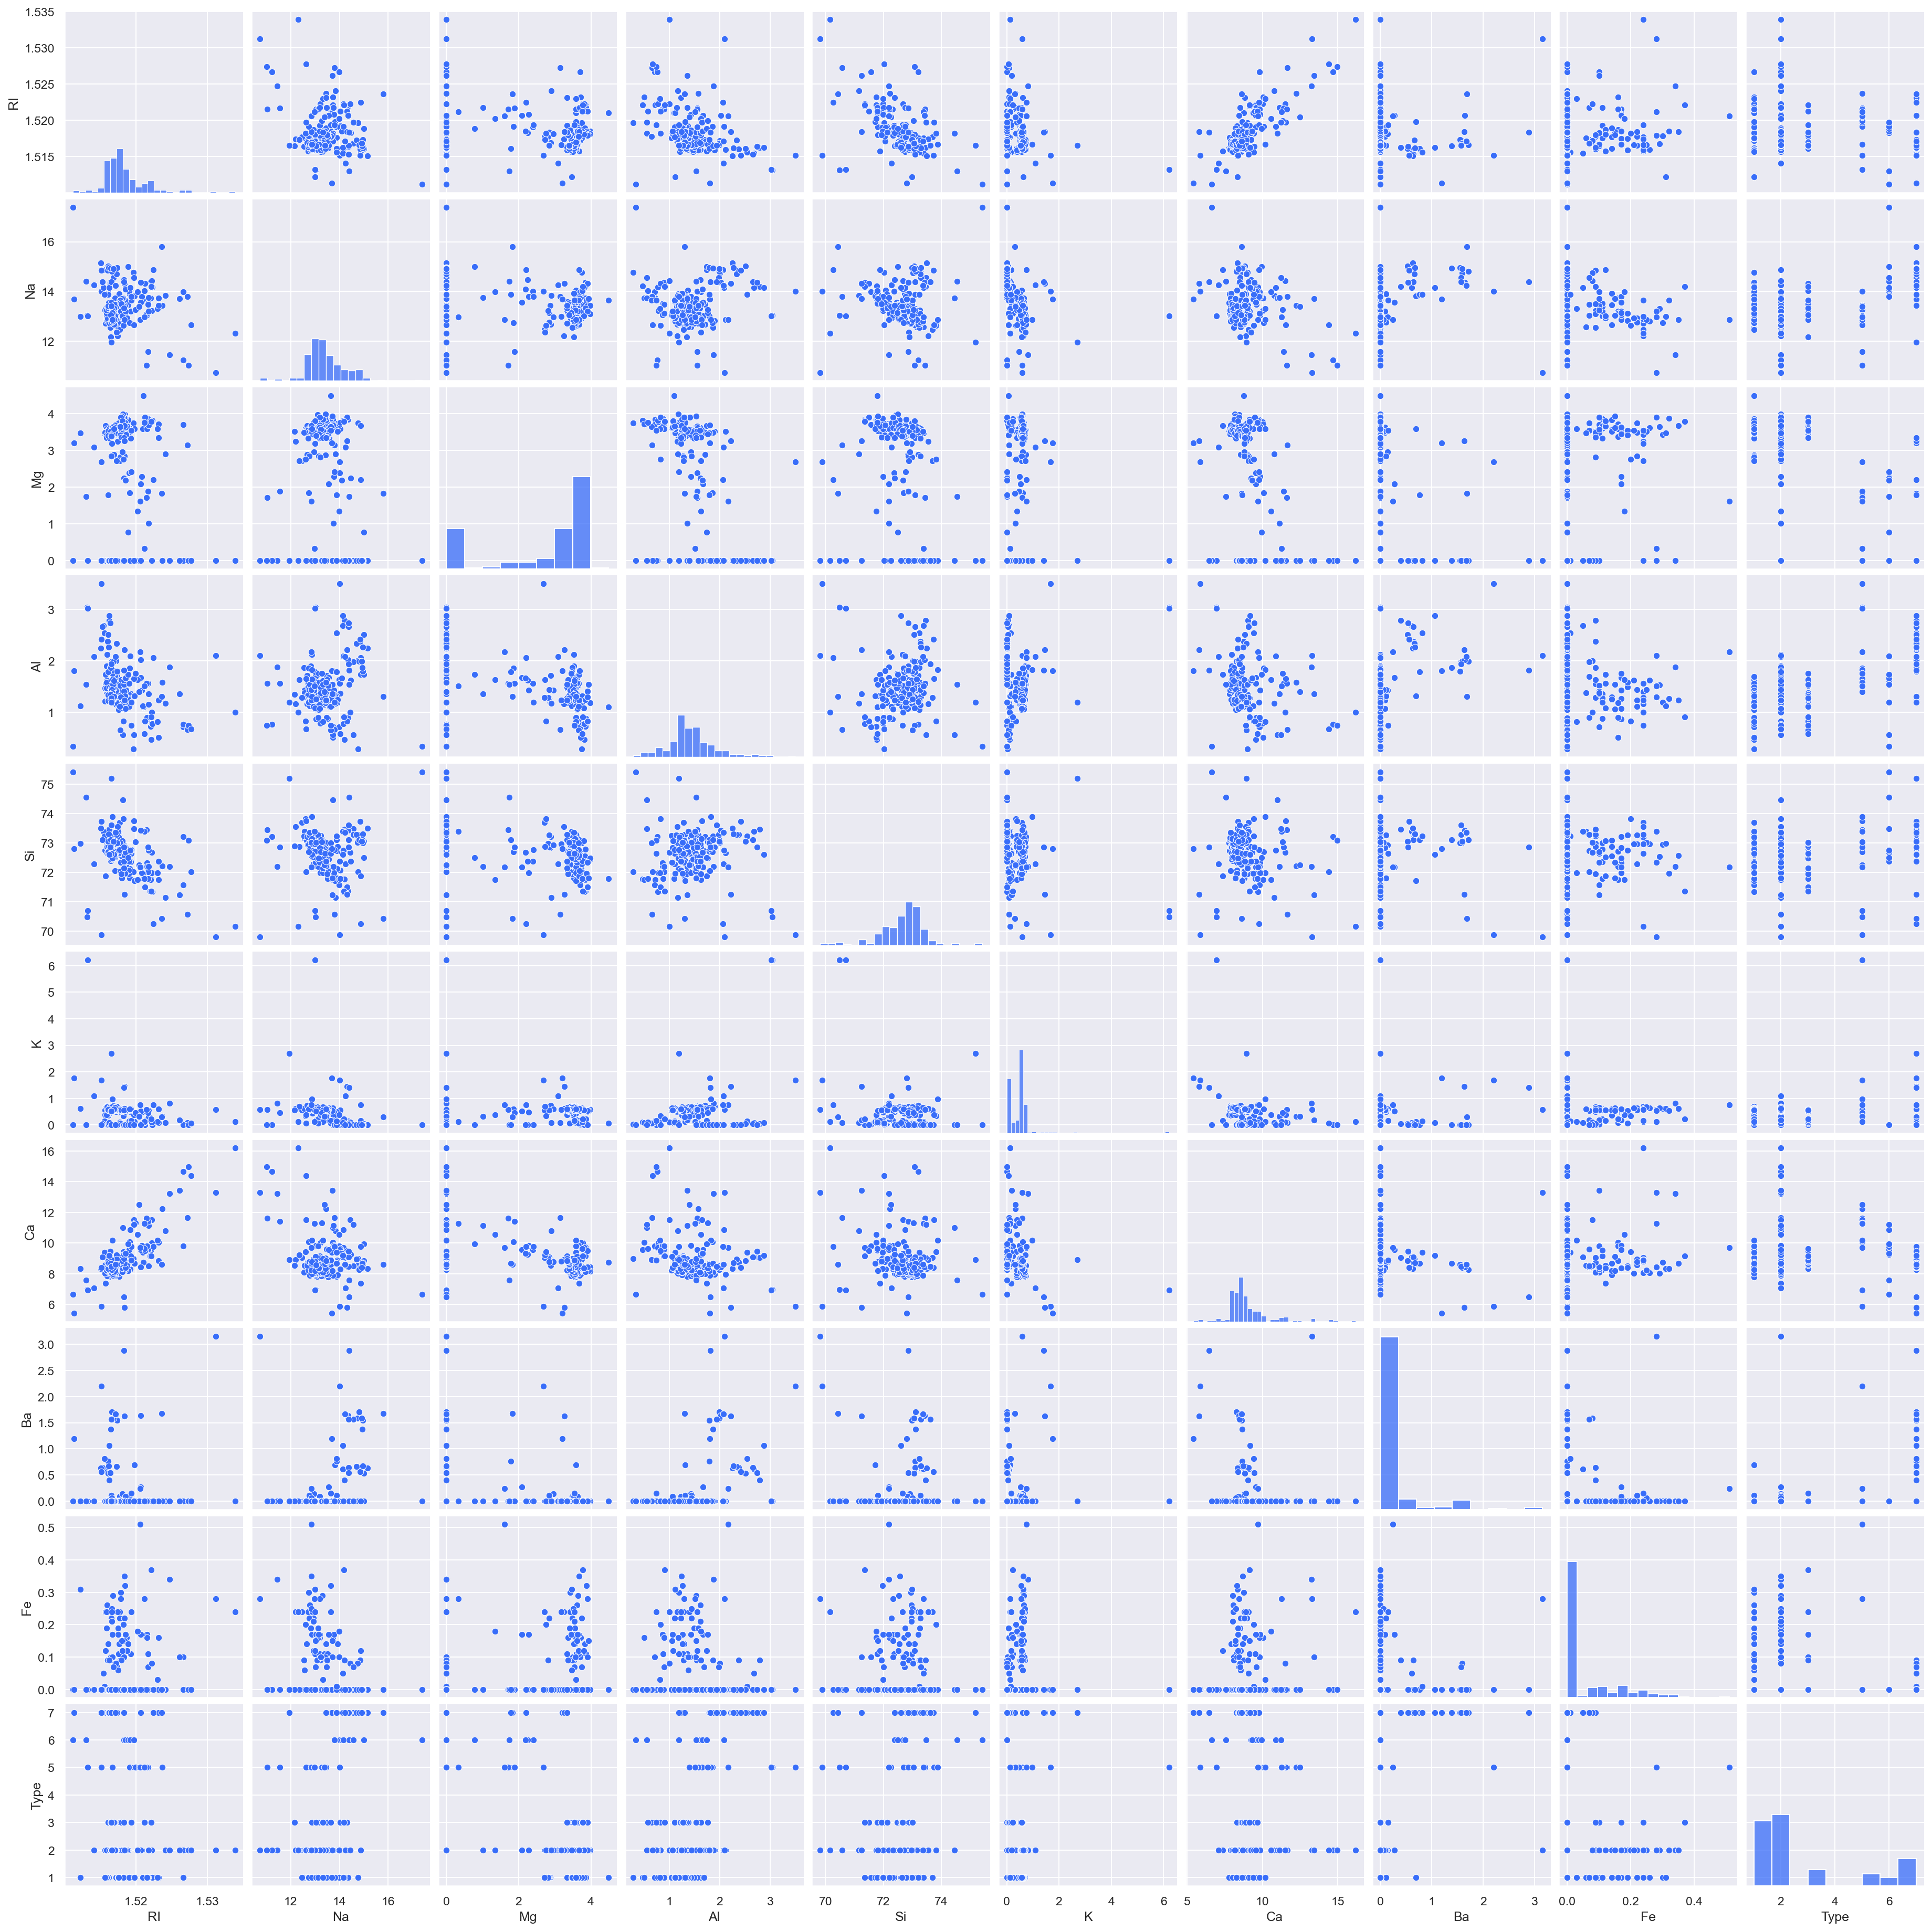

In [38]:
#pairplot
sns.pairplot(data)
plt.show()


In [39]:
#correlation
data.corr()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
RI,1.000000,-0.198802,-0.127526,-0.400973,-0.539000,-0.287645,0.811183,0.001679,0.147083,-0.160140
Na,-0.198802,1.000000,-0.278420,0.167735,-0.064885,-0.264158,-0.278194,0.329080,-0.239374,0.508837
Mg,-0.127526,-0.278420,1.000000,-0.479575,-0.162437,0.007617,-0.446197,-0.491818,0.085426,-0.744195
Al,-0.400973,0.167735,-0.479575,1.000000,-0.016195,0.323683,-0.258068,0.480642,-0.080583,0.597432
Si,-0.539000,-0.064885,-0.162437,-0.016195,1.000000,-0.197281,-0.207145,-0.104389,-0.097717,0.147725
K,-0.287645,-0.264158,0.007617,0.323683,-0.197281,1.000000,-0.317032,-0.043653,-0.009372,-0.012455
Ca,0.811183,-0.278194,-0.446197,-0.258068,-0.207145,-0.317032,1.000000,-0.112208,0.126314,0.002677
Ba,0.001679,0.329080,-0.491818,0.480642,-0.104389,-0.043653,-0.112208,1.000000,-0.059729,0.574896
Fe,0.147083,-0.239374,0.085426,-0.080583,-0.097717,-0.009372,0.126314,-0.059729,1.000000,-0.191090
Type,-0.160140,0.508837,-0.744195,0.597432,0.147725,-0.012455,0.002677,0.574896,-0.191090,1.000000


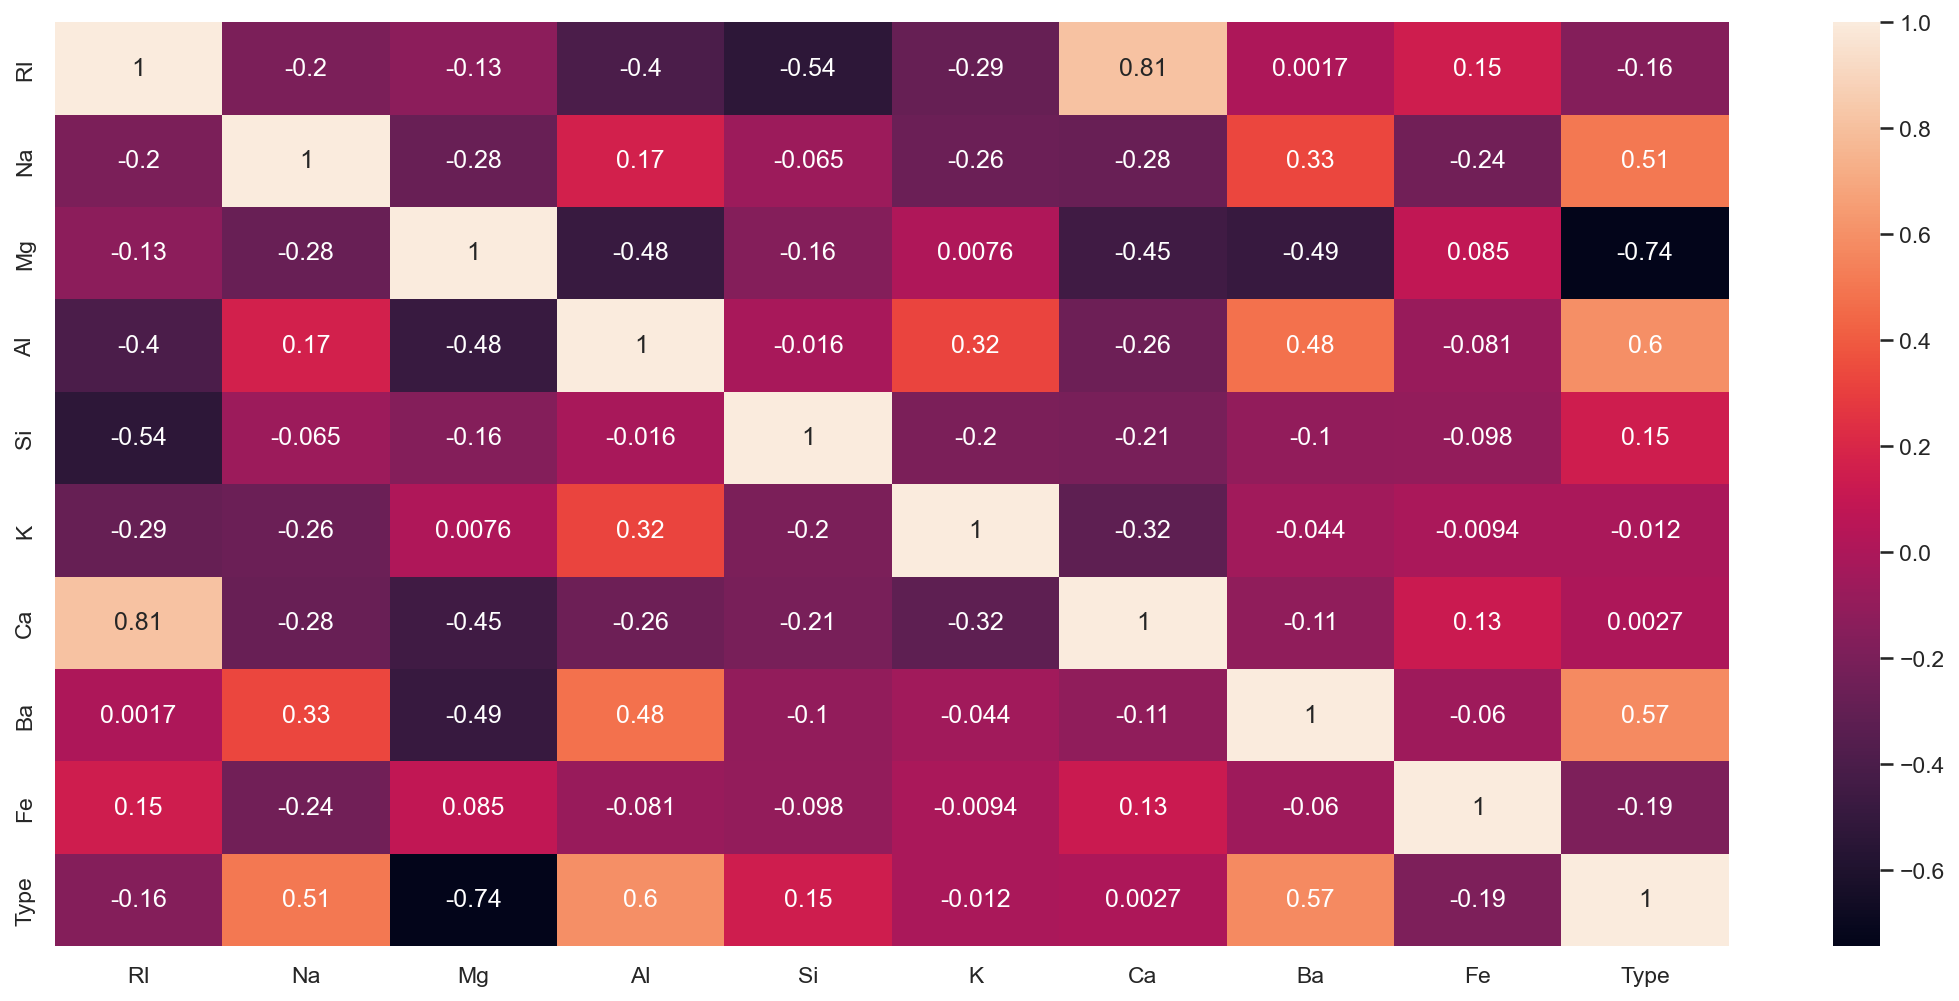

In [40]:
sns.heatmap(data.corr(), annot=True)
plt.show()


# Data Preprocessing

In [41]:
from sklearn.preprocessing import StandardScaler
X = data.drop(columns=['Type'])
y = data['Type']
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42
scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)

scaled_X = pd.DataFrame(scaled_X, columns=X.columns)
scaled_X.describe()


,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
count,2.130000e+02,2.130000e+02,2.130000e+02,2.130000e+02,2.130000e+02,2.130000e+02,2.130000e+02,2.130000e+02,2.130000e+02
mean,-1.204670e-14,-3.402599e-15,2.668705e-16,-1.667941e-16,1.003266e-14,7.297241e-17,-1.200917e-15,-3.335881e-17,-1.876433e-17
std,1.002356e+00,1.002356e+00,1.002356e+00,1.002356e+00,1.002356e+00,1.002356e+00,1.002356e+00,1.002356e+00,1.002356e+00
min,-2.378762e+00,-3.282120e+00,-1.860172e+00,-2.343529e+00,-3.684469e+00,-7.655541e-01,-2.477335e+00,-3.538076e-01,-5.883011e-01
25%,-6.040464e-01,-6.187036e-01,-4.090832e-01,-5.244639e-01,-4.857298e-01,-5.660605e-01,-5.019818e-01,-3.538076e-01,-5.883011e-01
50%,-2.206815e-01,-1.277513e-01,5.559947e-01,-1.808627e-01,1.747387e-01,9.380307e-02,-2.489117e-01,-3.538076e-01,-5.883011e-01
75%,2.651344e-01,4.982129e-01,6.393107e-01,3.648569e-01,5.632496e-01,1.705314e-01,1.377232e-01,-3.538076e-01,4.388147e-01
max,5.149732e+00,4.879962e+00,1.257238e+00,4.144470e+00,3.567734e+00,8.764103e+00,5.086650e+00,5.983278e+00,4.649990e+00


# Random Forest Model 

In [42]:
X_train, X_test, y_train, y_test = train_test_split(scaled_X, y, test_size=0.2, random_state=42)

print("Shapes")
print("X_train :", X_train.shape)
print("X_test  :", X_test.shape)
print("y_train :", y_train.shape)
print("y_test  :", y_test.shape)
     


Shapes
X_train : (170, 9)
X_test  : (43, 9)
y_train : (170,)
y_test  : (43,)


In [43]:
def prediction(model, X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test ):
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    print(f"Train Accuracy: {model.score(X_train,y_train)}")
    print(f"Test Accuracy: {model.score(X_test,y_test)}")
    print('Classification Report')
    print(classification_report(y_test,y_pred))
    return model.estimators_[0]

In [44]:
model_estimators_tree_plot = prediction(RandomForestClassifier())

Train Accuracy: 1.0
Test Accuracy: 0.7906976744186046
Classification Report
              precision    recall  f1-score   support

           1       0.83      1.00      0.91        10
           2       0.67      0.80      0.73        15
           3       1.00      0.67      0.80         3
           5       0.50      0.33      0.40         3
           6       1.00      0.67      0.80         3
           7       1.00      0.78      0.88         9

    accuracy                           0.79        43
   macro avg       0.83      0.71      0.75        43
weighted avg       0.81      0.79      0.79        43



In [46]:
#hyperparameters tunning
from sklearn.model_selection import GridSearchCV, train_test_split

params = {
    'n_estimators':[100,150,200],
    'criterion':['gini', 'entropy'],
    'max_depth':[3,5,7,11],
    'max_features':['auto', 'sqrt', 'log2'],
}

grid = GridSearchCV(RandomForestClassifier(random_state = 1234), params, verbose=1)
grid.fit(X_train,y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


GridSearchCV(estimator=RandomForestClassifier(random_state=1234),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 11],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [100, 150, 200]},
             verbose=1)

In [48]:
grid.best_params_

{'criterion': 'gini',
 'max_depth': 7,
 'max_features': 'sqrt',
 'n_estimators': 100}

In [49]:
model_estimators_tree_plot = prediction(RandomForestClassifier(criterion='gini', max_depth=7, max_features='sqrt', n_estimators=100, random_state=1234))
     

Train Accuracy: 0.9705882352941176
Test Accuracy: 0.813953488372093
Classification Report
              precision    recall  f1-score   support

           1       0.71      1.00      0.83        10
           2       0.79      0.73      0.76        15
           3       1.00      0.67      0.80         3
           5       0.75      1.00      0.86         3
           6       1.00      0.67      0.80         3
           7       1.00      0.78      0.88         9

    accuracy                           0.81        43
   macro avg       0.88      0.81      0.82        43
weighted avg       0.84      0.81      0.81        43



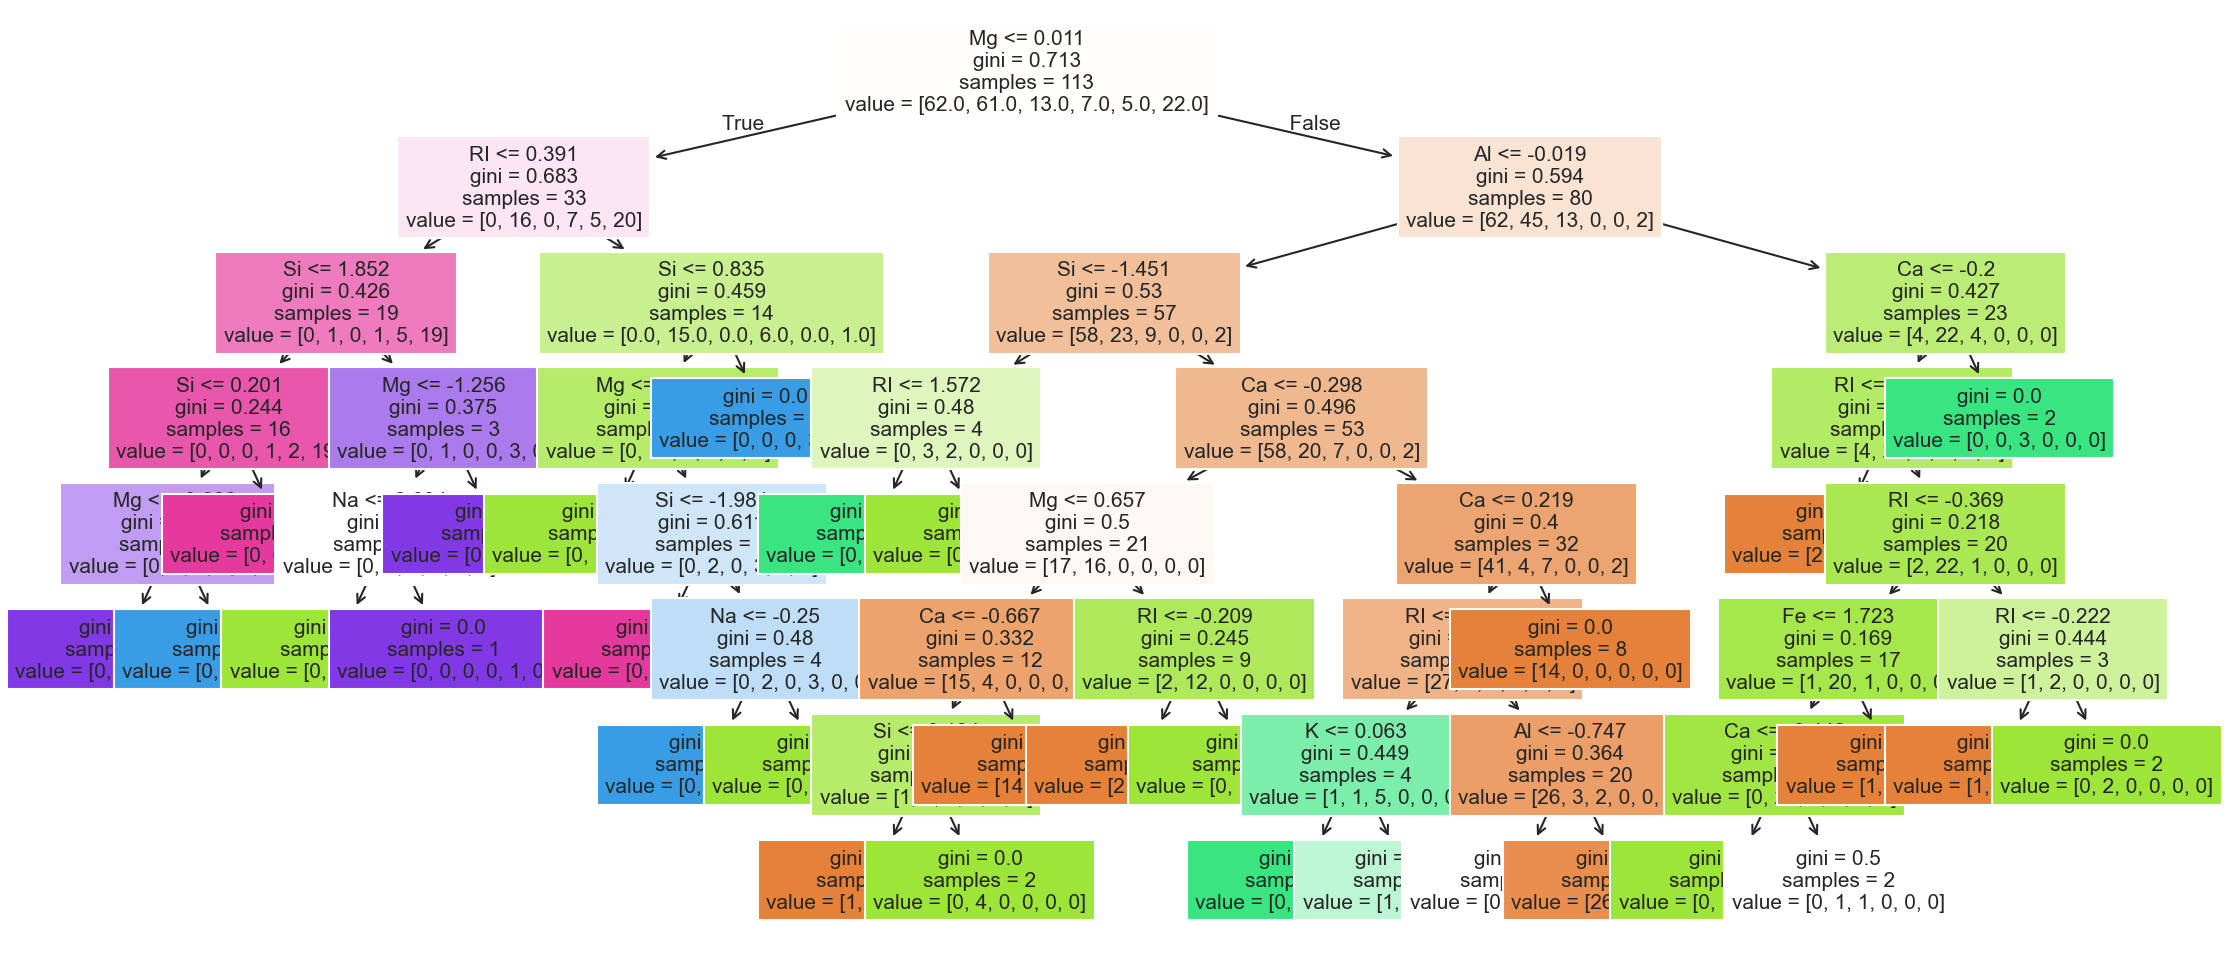

In [50]:
#tree
tree.plot_tree(model_estimators_tree_plot, feature_names=X.columns, filled=True, fontsize=10)
plt.show()

# Bagging and Boosting Methods

In [51]:
#gradient boosting classifier model
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier, StackingClassifier

model_estimators_tree_plot = prediction(GradientBoostingClassifier(n_estimators=100, random_state=1234))
     


Train Accuracy: 1.0
Test Accuracy: 0.7441860465116279
Classification Report
              precision    recall  f1-score   support

           1       0.75      0.90      0.82        10
           2       0.67      0.67      0.67        15
           3       0.67      0.67      0.67         3
           5       0.50      0.33      0.40         3
           6       1.00      0.67      0.80         3
           7       0.89      0.89      0.89         9

    accuracy                           0.74        43
   macro avg       0.75      0.69      0.71        43
weighted avg       0.74      0.74      0.74        43



In [53]:
#hyperparameters tunning 
from sklearn.model_selection import GridSearchCV, train_test_split

params = {
    'learning_rate' : [ 0.2, 0.3],
    'n_estimators' : [90,110,150],
    'subsample' : [0.5, 0.7],
    'criterion' : ['friedman_mse', 'squared_error'],
    'min_samples_split' : [2,3,4],
    #'min_samples_leaf' : [1,2,3],
    #'max_depth' : [3,5,7,11],
    #'max_features' : ['auto', 'sqrt', 'log2']
}

grid = GridSearchCV(GradientBoostingClassifier(random_state=1234), params, verbose=1)
grid.fit(X_train,y_train)
     

Fitting 5 folds for each of 72 candidates, totalling 360 fits


GridSearchCV(estimator=GradientBoostingClassifier(random_state=1234),
             param_grid={'criterion': ['friedman_mse', 'squared_error'],
                         'learning_rate': [0.2, 0.3],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [90, 110, 150],
                         'subsample': [0.5, 0.7]},
             verbose=1)

In [55]:
grid.best_params_

{'criterion': 'friedman_mse',
 'learning_rate': 0.3,
 'min_samples_split': 4,
 'n_estimators': 90,
 'subsample': 0.7}

In [56]:
model_estimators_tree_plot = prediction(GradientBoostingClassifier(learning_rate=0.3, min_samples_split=2, subsample=0.7, n_estimators=110, criterion='friedman_mse', random_state=1234))
     

Train Accuracy: 1.0
Test Accuracy: 0.813953488372093
Classification Report
              precision    recall  f1-score   support

           1       0.90      0.90      0.90        10
           2       0.72      0.87      0.79        15
           3       1.00      0.67      0.80         3
           5       0.50      0.33      0.40         3
           6       1.00      0.67      0.80         3
           7       0.89      0.89      0.89         9

    accuracy                           0.81        43
   macro avg       0.84      0.72      0.76        43
weighted avg       0.82      0.81      0.81        43



In [59]:
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

y1 = le.fit_transform(y)
y1

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5])

In [60]:
X_train, X_test, y_train, y_test = train_test_split(scaled_X, y1, test_size=0.2, random_state=42)

print("Shapes")
print("X_train :", X_train.shape)
print("X_test  :", X_test.shape)
print("y_train :", y_train.shape)
print("y_test  :", y_test.shape)
     

Shapes
X_train : (170, 9)
X_test  : (43, 9)
y_train : (170,)
y_test  : (43,)


In [61]:
def prediction1(model, X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test ):
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    print(f"Train Accuracy: {model.score(X_train,y_train)}")
    print(f"Test Accuracy: {model.score(X_test,y_test)}")
    print('Classification Report')
    print(classification_report(y_test,y_pred))


In [62]:
prediction1(XGBClassifier(random_state=1234))

Train Accuracy: 1.0
Test Accuracy: 0.8604651162790697
Classification Report
              precision    recall  f1-score   support

           0       0.82      0.90      0.86        10
           1       0.81      0.87      0.84        15
           2       1.00      0.67      0.80         3
           3       0.75      1.00      0.86         3
           4       1.00      1.00      1.00         3
           5       1.00      0.78      0.88         9

    accuracy                           0.86        43
   macro avg       0.90      0.87      0.87        43
weighted avg       0.87      0.86      0.86        43



In [63]:
params = {
    'n_estimators' : [90,110],
    'learning_rate' : [0.1, 0.2],
    'booster' : ['gbtree'],
    #'lambda' : [0,1,2,3],
    'subsample' : [0.5, 0.7, 1.0],
    #'criterion' : ['friedman_mse', 'squared_error'],
    'min_samples_split' : [2,3,4],
    #'min_samples_leaf' : [1,2,3],
    'max_depth' : [3,5],
    #'max_features' :['auto', 'sqrt', 'log2']
}

grid = GridSearchCV(XGBClassifier(random_state=1234), params, verbose=1)

grid.fit(X_train,y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


GridSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_b...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=1234, ...),
             param_grid={'booster': ['gbtree'], 'learning_rate': [0.1, 0.2],
                         'max_depth': [3, 5], 'min_samples_split': [2, 3, 4],
                         'n_estimators': [90, 110],
                         'subsample': [0.5, 0.7, 1.0]},
             verbose=1)

In [64]:
grid.best_params_


{'booster': 'gbtree',
 'learning_rate': 0.1,
 'max_depth': 5,
 'min_samples_split': 2,
 'n_estimators': 90,
 'subsample': 0.7}

In [65]:
prediction1(model = XGBClassifier(booster='gbtree', subsample=0.6, criterion='friedman_mse', learning_rate=0.2, max_depth=4, n_estimators=90,random_state=1234))
   

Train Accuracy: 1.0
Test Accuracy: 0.8604651162790697
Classification Report
              precision    recall  f1-score   support

           0       0.82      0.90      0.86        10
           1       0.78      0.93      0.85        15
           2       1.00      0.33      0.50         3
           3       1.00      1.00      1.00         3
           4       1.00      1.00      1.00         3
           5       1.00      0.78      0.88         9

    accuracy                           0.86        43
   macro avg       0.93      0.82      0.85        43
weighted avg       0.88      0.86      0.85        43

